All data credits belong to the wonderful work done by **Rekhta foundation**. 
Data has been parsed into Urdu, Hindi and English translieration thanks to their excellent data organization.
Consider supporting them for their great work in pushing the urdu language.

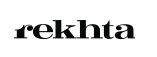

Credits to these authors for their wonderful original creations:

*'mirza-ghalib','allama-iqbal','faiz-ahmad-faiz','sahir-ludhianvi','meer-taqi-meer',
'dagh-dehlvi','kaifi-azmi','gulzar','bahadur-shah-zafar','parveen-shakir',
'jaan-nisar-akhtar','javed-akhtar','jigar-moradabadi','jaun-eliya',
 'ahmad-faraz','meer-anees','mohsin-naqvi','firaq-gorakhpuri','fahmida-riaz','wali-mohammad-wali',
 'waseem-barelvi','akbar-allahabadi','altaf-hussain-hali','ameer-khusrau','naji-shakir','naseer-turabi',
 'nazm-tabatabai','nida-fazli','noon-meem-rashid', 'habib-jalib'*



In [10]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request


# credits to this stackoverflow answer https://stackoverflow.com/questions/1936466/beautifulsoup-grab-visible-webpage-text

allowed_sections=['style', 'script', 'head', 'title', 'meta', '[document]']


def tag_visible(element):
    if element.parent.name in allowed_sections:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

In [11]:
#captures the different <p> tags as newlines
def text_with_newlines(elem):
    text = ''
    for e in elem.descendants:
        if isinstance(e, str):
            text += e
        elif e.name == 'br' or e.name == 'p':
            text += '\n'
    return text


def parse_ghazal(url):
    html = urllib.request.urlopen(url).read()
    soup= BeautifulSoup(html, 'html.parser')
    mydivs = soup.find("div", {"class": "pMC"})
    
    #this section removes some of the English translations present on the webpage
    # mixing language data would add noise, and make it difficult for the model to learn
    #BUT in future these urdu to english translations could be a valuable resource to prepare machine translation data 
    for div in mydivs.find_all("div", {'class':'t'}): 
        div.decompose()
    
    mydivs= text_with_newlines(mydivs)
    return mydivs

In [12]:
url_english='https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1'
url_urdu='https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1?lang=ur'
url_hindi='https://www.rekhta.org/ghazals/sitaaron-se-aage-jahaan-aur-bhii-hain-allama-iqbal-ghazals-1?lang=hi'

ghazal = parse_ghazal(url_english)
print(ghazal)

'''
    okay I have a problem the way this urdu font is rendered. It is absolutely terrible to read.
    There have to be better font options.
'''



sitāroñ se aage jahāñ aur bhī haiñ 
abhī ishq ke imtihāñ aur bhī haiñ 
tahī zindagī se nahīñ ye fazā.eñ 
yahāñ saikḌoñ kārvāñ aur bhī haiñ 
qanā.at na kar ālam-e-rañg-o-bū par 
chaman aur bhī āshiyāñ aur bhī haiñ 
agar kho gayā ik nasheman to kyā ġham 
maqāmāt-e-āh-o-fuġhāñ aur bhī haiñ 
tū shāhīñ hai parvāz hai kaam terā 
tire sāmne āsmāñ aur bhī haiñ 
isī roz o shab meñ ulajh kar na rah jā 
ki tere zamān o makāñ aur bhī haiñ 
ga.e din ki tanhā thā maiñ anjuman meñ 
yahāñ ab mire rāz-dāñ aur bhī haiñ 


'\n    okay I have a problem the way this urdu font is rendered. It is absolutely terrible to read.\n    There have to be better font options.\n'

## Parsed text samples

### English transliteration

sitāroñ se aage jahāñ aur bhī haiñ abhī ishq ke imtihāñ aur bhī haiñ

tū shāhīñ hai parvāz hai kaam terā tire sāmne āsmāñ aur bhī haiñ 

isī roz o shab meñ ulajh kar na rah jā ki tere zamān o makāñ aur bhī haiñ

### Urdu 

ستاروں سے آگے جہاں اور بھی ہیں

تو شاہیں ہے پرواز ہے کام تیرا ترے سامنے آسماں اور بھی ہیں

اسی روز و شب میں الجھ کر نہ رہ جا کہ تیرے زمان و مکاں اور بھی ہیں


### Hindi 
सितारों से आगे जहाँ और भी हैं अभी इश्क़ के इम्तिहाँ और भी हैं

तू शाहीं है परवाज़ है काम तेरा तिरे सामने आसमाँ और भी हैं

इसी रोज़ ओ शब में उलझ कर न रह जा कि तेरे ज़मान ओ मकाँ और भी हैं

### Observing the structure of urls to make sure the same script would work across different poets on the webpage

In [13]:
#The folder structure has urls as https://www.rekhta.org/ghazals/
#https://www.rekhta.org/ghazals/tire-ishq-kii-intihaa-chaahtaa-huun-allama-iqbal-ghazals
#Iqbal
url='https://www.rekhta.org/ghazals/tire-ishq-kii-intihaa-chaahtaa-huun-allama-iqbal-ghazals'
url= 'https://www.rekhta.org/ghazals/kabhii-ai-haqiiqat-e-muntazar-nazar-aa-libaas-e-majaaz-men-allama-iqbal-ghazals'

##Ghalib's ghazals
## there are currently 234 ghazals by this poet on the page
## which makes it a rich resource for training a text model
url= 'https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals'
url ='https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals?lang=ur'
url='https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals?lang=hi'
url='https://www.rekhta.org/ghazals/har-ek-baat-pe-kahte-ho-tum-ki-tuu-kyaa-hai-mirza-ghalib-ghazals'

url='https://www.rekhta.org/ghazals/ishq-mujh-ko-nahiin-vahshat-hii-sahii-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/ishq-mujh-ko-nahiin-vahshat-hii-sahii-mirza-ghalib-ghazals?lang=ur'
url='https://www.rekhta.org/ghazals/ishq-mujh-ko-nahiin-vahshat-hii-sahii-mirza-ghalib-ghazals?lang=hi'

url='https://www.rekhta.org/ghazals/koii-din-gar-zindagaanii-aur-hai-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/koii-din-gar-zindagaanii-aur-hai-mirza-ghalib-ghazals?lang=ur'

url='https://www.rekhta.org/ghazals/hai-bazm-e-butaan-men-sukhan-aazurda-labon-se-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/hai-bazm-e-butaan-men-sukhan-aazurda-labon-se-mirza-ghalib-ghazals?lang=ur'

url='https://www.rekhta.org/ghazals/ghar-jab-banaa-liyaa-tire-dar-par-kahe-bagair-mirza-ghalib-ghazals'
url='https://www.rekhta.org/ghazals/ghar-jab-banaa-liyaa-tire-dar-par-kahe-bagair-mirza-ghalib-ghazals?lang=hi'
url='https://www.rekhta.org/ghazals/ghar-jab-banaa-liyaa-tire-dar-par-kahe-bagair-mirza-ghalib-ghazals?lang=ur'

## Sahir Ludhianvi
url='https://www.rekhta.org/ghazals/kabhii-khud-pe-kabhii-haalaat-pe-ronaa-aayaa-sahir-ludhianvi-ghazals'
url='https://www.rekhta.org/ghazals/kabhii-khud-pe-kabhii-haalaat-pe-ronaa-aayaa-sahir-ludhianvi-ghazals?lang=ur'
url= 'https://www.rekhta.org/ghazals/kabhii-khud-pe-kabhii-haalaat-pe-ronaa-aayaa-sahir-ludhianvi-ghazals?lang=hi'



## Faiz
en_url='https://www.rekhta.org/ghazals/gulon-men-rang-bhare-baad-e-nau-bahaar-chale-faiz-ahmad-faiz-ghazals'
hindi_url='https://www.rekhta.org/ghazals/gulon-men-rang-bhare-baad-e-nau-bahaar-chale-faiz-ahmad-faiz-ghazals?lang=hi'
urdu_url='https://www.rekhta.org/ghazals/gulon-men-rang-bhare-baad-e-nau-bahaar-chale-faiz-ahmad-faiz-ghazals?lang=ur'



url='https://www.rekhta.org/ghazals/hazaaron-khvaahishen-aisii-ki-har-khvaahish-pe-dam-nikle-mirza-ghalib-ghazals'#?lang=ur'
ghazal = parse_ghazal(url)
print(ghazal)


hazāroñ ḳhvāhisheñ aisī ki har ḳhvāhish pe dam nikle 
bahut nikle mire armān lekin phir bhī kam nikle 
Dare kyuuñ merā qātil kyā rahegā us kī gardan par 
vo ḳhuuñ jo chashm-e-tar se umr bhar yuuñ dam-ba-dam nikle 
nikalnā ḳhuld se aadam kā sunte aa.e haiñ lekin 
bahut be-ābrū ho kar tire kūche se ham nikle 
bharam khul jaa.e zālim tere qāmat kī darāzī kā 
agar is turra-e-pur-pech-o-ḳham kā pech-o-ḳham nikle 
magar likhvā.e koī us ko ḳhat to ham se likhvā.e 
huī sub.h aur ghar se kaan par rakh kar qalam nikle 
huī is daur meñ mansūb mujh se bāda-āshāmī 
phir aayā vo zamāna jo jahāñ meñ jām-e-jam nikle 
huī jin se tavaqqo' ḳhastagī kī daad paane kī 
vo ham se bhī ziyāda ḳhasta-e-teġh-e-sitam nikle 
mohabbat meñ nahīñ hai farq jiine aur marne kā 
usī ko dekh kar jiite haiñ jis kāfir pe dam nikle 
kahāñ mai-ḳhāne kā darvāza 'ġhālib' aur kahāñ vaa.iz 
par itnā jānte haiñ kal vo jaatā thā ki ham nikle 


In [14]:
import os

In [15]:
#testing the homepage for parsing all poet names now
#for ghalib

def parse_webpage_at_given_scroll(html):
    ctr=0
    soup= BeautifulSoup(html, 'html.parser')
    mydivs = soup.find("div", {"class": "contentListBody"})
    titles=[]
    for a in mydivs.find_all('a', href=True):
        t=a['href']
        if t not in titles:
            if ctr%5==0:
                print("Found the URL:", t)
            titles.append(t)
            ctr+=1
    print('=============================')    
    print('number of titles',len(titles))
    print('=============================')
    
    return titles


In [16]:
#language argument can be ur or hi for urdu or hindi

from tqdm import tqdm
def read_and_write_web(author,language='ur'):
    
    lang=language
    #author='mirza-ghalib'
    author_lan=author+'/'+lang
    if not os.path.exists(author_lan):
        os.makedirs(author_lan)

    for url in tqdm(titles):
        try:
            name_poem=url.split('https://www.rekhta.org/ghazals/')[1]
            path_poem= author_lan+'/'+name_poem
#             print(path_poem)
            if os.path.exists(path_poem):
                pass
            else:
                try:
                    path_poem= path_poem.split('?')[0]
                except:
                    pass
            
                f= open(path_poem,"w+", encoding="utf-8")
                if lang=='en':
                    url_for_lang= url
                else:
                    url_for_lang= url+'?lang='+lang
                ghazal = parse_ghazal(url_for_lang)
                f.write(ghazal)
                f.close()
        except:
            print(url)


In [17]:
# Extract rows where the 'auth' column is equal to 'parsa_kausari'
result = df.loc[df['auth'] == 'vijay-sharma']
print(result)

              name                                       href  \
1047  Vijay Sharma  https://www.rekhta.org/poets/vijay-sharma   
1097  Vijay Sharma  https://www.rekhta.org/poets/vijay-sharma   

                                               location          auth  
1047  <a href="/domicile/india/other-10/other/delhi/...  vijay-sharma  
1097  <a href="/domicile/india/other-10/other/delhi/...  vijay-sharma  


In [18]:
470-304
1211-1047

164

In [19]:
import pandas as pd

filename = 'poets.csv'  # specify the name of the CSV file

df = pd.read_csv(filename)
df['auth'] = df['href'].str.split('/').str[-1]

df=df[1047: ]
df.head(30)

,name,href,location,auth
1047,Vijay Sharma,https://www.rekhta.org/poets/vijay-sharma,"<a href=""/domicile/india/other-10/other/delhi/...",vijay-sharma
1048,Vijendra Singh Parwaz,https://www.rekhta.org/poets/vijendra-singh-pa...,"<a href=""/domicile/india/uttar-pradesh/other-4...",vijendra-singh-parwaz
1049,Vikas Joshi Wahid,https://www.rekhta.org/poets/vikas-joshi-wahid,"<a href=""/domicile/india/madhya-pradesh/other-...",vikas-joshi-wahid
1050,Vikas Rana,https://www.rekhta.org/poets/vikas-rana,"<a href=""/domicile/india/other-10/other/delhi/...",vikas-rana
1051,Vikas Sharma Raaz,https://www.rekhta.org/poets/vikas-sharma-raaz,"<a href=""/domicile/india/haryana/na/na/poets"">...",vikas-sharma-raaz
1052,Vikram,https://www.rekhta.org/poets/vikram,"<a href=""/domicile/india/uttar-pradesh/other-4...",vikram
1053,Vikram Gaur Vairagi,https://www.rekhta.org/poets/vikram-gaur-vairagi,"<a href=""/domicile/india/uttar-pradesh/other-4...",vikram-gaur-vairagi
1054,Vikram Mishra Angadh,https://www.rekhta.org/poets/vikram-mishra-angadh,NaN,vikram-mishra-angadh
1055,Vikram Sharma,https://www.rekhta.org/poets/vikram-sharma,"<a href=""/domicile/india/rajasthan/na/na/poets...",vikram-sharma
1056,Vilas Pandit Musafir,https://www.rekhta.org/poets/vilas-pandit-musafir,NaN,vilas-pandit-musafir


In [20]:
authors=df['auth']
authors

1047                vijay-sharma
1048       vijendra-singh-parwaz
1049           vikas-joshi-wahid
1050                  vikas-rana
1051           vikas-sharma-raaz
                  ...           
1207               zaheer-dehlvi
1208            zaheer-fatehpuri
1209            zaheer-ghazipuri
1210             zaheer-kashmiri
1211    zaheer-nashad-darbhangwi
Name: auth, Length: 165, dtype: object

In [21]:
##Parsing based on home page of authors
url_base='https://www.rekhta.org/poets/'

# ## TODO : Later
# ## or just iterate through the list of all poets on the index, instead of hand curated list
# authors=['mirza-ghalib','allama-iqbal','faiz-ahmad-faiz','sahir-ludhianvi','meer-taqi-meer',
#          'dagh-dehlvi','kaifi-azmi','gulzar','bahadur-shah-zafar','parveen-shakir',
#          'jaan-nisar-akhtar','javed-akhtar','jigar-moradabadi','jaun-eliya',
#          'ahmad-faraz','meer-anees','mohsin-naqvi','firaq-gorakhpuri','fahmida-riaz','wali-mohammad-wali',
#         'waseem-barelvi','akbar-allahabadi','altaf-hussain-hali','ameer-khusrau','naji-shakir','naseer-turabi'
#         ,'nazm-tabatabai','nida-fazli','noon-meem-rashid','habib-jalib']



for author in tqdm(authors):
    url_home_page= url_base +author+ '/ghazals'
    html = urllib.request.urlopen(url_home_page).read()
    titles= parse_webpage_at_given_scroll(html)
    read_and_write_web(author,'en')
    read_and_write_web(author,'ur')
    read_and_write_web(author,'hi')

  0%|                                                                                          | 0/165 [00:00<?, ?it/s]

Found the URL: https://www.rekhta.org/ghazals/baara-chaand-gae-puunam-ke-pyaar-bharaa-ik-saavan-bhii-vijay-sharma-arsh-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/nam-aankhon-men-kyaa-kar-legaa-gussa-dekhenge-vijay-sharma-arsh-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/rahii-hai-yuun-hii-nadaamat-mujhe-muqaddar-se-vijay-sharma-arsh-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tamaam-ret-pe-bikhraa-hai-tan-udaasii-kaa-vijay-sharma-ghazals?sort=popularity-desc
number of titles 20



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.55it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]

  1%|▍                                                                               | 1/165 [00:41<1:53:23, 41.48s/it]

Found the URL: https://www.rekhta.org/ghazals/jo-tuu-nahiin-to-ye-duniyaa-rukii-rukii-sii-lage-vijendra-singh-parwaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aakhir-udaas-udaas-tabiiat-bhii-kyaa-kare-vijendra-singh-parwaz-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.28it/s]

  1%|▉                                                                               | 2/165 [01:01<1:18:15, 28.81s/it]

Found the URL: https://www.rekhta.org/ghazals/saath-teraa-agar-nahiin-hotaa-vikas-joshi-wahid-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dard-dil-men-na-aankhon-men-paanii-rahe-vikas-joshi-wahid-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.27it/s]

  2%|█▍                                                                              | 3/165 [01:23<1:09:08, 25.61s/it]

Found the URL: https://www.rekhta.org/ghazals/tere-pahluu-yaa-darmiyaan-nikle-vikas-rana-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.88it/s]

  2%|█▉                                                                                | 4/165 [01:32<51:23, 19.15s/it]

Found the URL: https://www.rekhta.org/ghazals/roz-ye-khvaab-daraataa-hain-mujhe-vikas-sharma-raaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zindagii-kii-hansii-udaatii-huii-vikas-sharma-raaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-khandar-men-khade-hue-hain-ham-vikas-sharma-raaz-ghazals
Found the URL: https://www.rekhta.org/ghazals/daag-hone-lage-zaahir-mere-vikas-sharma-raaz-ghazals?sort=popularity-desc
number of titles 16



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:10<00:00,  1.59it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:10<00:00,  1.50it/s]

  3%|██▍                                                                             | 5/165 [02:04<1:03:04, 23.65s/it]

Found the URL: https://www.rekhta.org/ghazals/dariyaa-kii-dastaras-men-ravaanii-ke-saath-saath-vikram-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/lahr-pe-bante-bigadte-habaab-kii-suurat-vikram-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/roz-shab-khuun-maartii-hai-havas-vikram-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kaii-nadiyaan-mujh-men-bah-nikliin-mirii-mittii-nam-karne-ke-liye-vikram-ghazals?sort=popularity-desc
number of titles 20



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.18it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.21it/s]

  4%|██▉                                                                             | 6/165 [02:57<1:29:05, 33.62s/it]

Found the URL: https://www.rekhta.org/ghazals/kabhii-milenge-to-ye-qarz-bhii-utaarenge-vikram-gaur-vairagi-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]

  4%|███▍                                                                            | 7/165 [03:00<1:02:48, 23.85s/it]

Found the URL: https://www.rekhta.org/ghazals/na-khushii-mujhe-hii-hai-vasl-kii-na-hii-hijr-kaa-bhii-malaal-hai-vikram-mishra-angadh-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]

  5%|███▉                                                                              | 8/165 [03:04<45:32, 17.40s/it]

Found the URL: https://www.rekhta.org/ghazals/mashvara-hai-ye-behtarii-ke-liye-vikram-sharma-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ek-khaamoshii-ne-sadaa-paaii-vikram-sharma-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aam-mauqon-pe-na-aankhon-men-ubhaare-aansuu-vikram-sharma-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.27it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:09<00:00,  1.20it/s]

  5%|████▍                                                                             | 9/165 [03:31<52:59, 20.38s/it]

Found the URL: https://www.rekhta.org/ghazals/apnii-to-guzrii-hai-akasr-apnii-hii-man-maanii-men-vilas-pandit-musafir-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.12it/s]

  6%|████▉                                                                            | 10/165 [03:43<46:07, 17.85s/it]

Found the URL: https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories



  7%|█████▍                                                                           | 11/165 [03:47<34:39, 13.50s/it]

https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories
Found the URL: https://www.rekhta.org/ghazals/gam-ko-dil-se-lagaa-ke-dekhaa-hai-vinay-shukla-mangal-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]

  7%|█████▉                                                                           | 12/165 [03:59<33:27, 13.12s/it]

Found the URL: https://www.rekhta.org/ghazals/sab-zaruurat-kaa-to-saamaan-hai-ghar-men-rahiye-vineet-aashna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/umr-bhar-us-kii-nishaanii-dekhiye-vineet-aashna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kis-kis-ko-main-muaaf-karuun-sab-nashe-men-hain-vineet-aashna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/maanaa-ki-meraa-jism-ye-juuthaa-gilaas-hai-vineet-aashna-ghazals?sort=popularity-desc
number of titles 17



100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.23it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:14<00:00,  1.18it/s]

  8%|██████▍                                                                          | 13/165 [04:42<56:08, 22.16s/it]

Found the URL: https://www.rekhta.org/ghazals/gila-to-un-ko-bhii-hai-main-jinhen-milaa-hii-nahiin-vinod-kumar-tripathi-bashar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/mujh-ko-us-se-najaat-bhii-na-rahii-vinod-kumar-tripathi-bashar-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.37it/s]

  8%|██████▊                                                                          | 14/165 [04:56<50:00, 19.87s/it]

Found the URL: https://www.rekhta.org/ghazals/farz-e-supurdagii-men-taqaaze-nahiin-hue-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vaqt-kii-taaq-pe-donon-kii-sajaaii-huii-raat-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/shahr-e-naazuk-se-vo-baariik-sadak-jaatii-hai-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/nazar-ik-saya-e-abr-e-balaa-par-jam-gaii-hai-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jism-bhii-aankh-ke-paanii-se-haraa-rahtaa-thaa-vipul-kumar-ghazals?sort=popularity-desc
number of titles 23



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:18<00:00,  1.25it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:18<00:00,  1.25it/s]

 74%|████████████████████████████████████████████████████████████▌                     | 17/23 [00:14<00:04,  1.32it/s]


  9%|███████▏                                                                       | 15/165 [05:53<1:17:13, 30.89s/it]

Found the URL: https://www.rekhta.org/ghazals/hote-rahe-hain-radd-o-badal-is-zamiin-par-v-c-rai-naya-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.17it/s]

 10%|███████▋                                                                       | 16/165 [06:06<1:03:47, 25.69s/it]

Found the URL: https://www.rekhta.org/ghazals/hijr-kii-daastaan-naii-likhkhuun-v-sudhakar-rao-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/hamaare-vaaste-raste-kahaan-duaa-ke-the-v-sudhakar-rao-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.03it/s]

 10%|████████▎                                                                        | 17/165 [06:20<54:10, 21.96s/it]

Found the URL: https://www.rekhta.org/ghazals/vo-zabaan-apnii-kholtaa-hii-nahiin-vc-ray-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]

 11%|████████▊                                                                        | 18/165 [06:29<44:14, 18.06s/it]

Found the URL: https://www.rekhta.org/ghazals/mumkin-nahiin-hai-apne-ko-rusvaa-vafaa-kare-vafa-barahi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/raah-e-ulfat-kii-aan-baaqii-hai-vafa-barahi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ye-shab-e-furqat-men-rang-e-gardish-e-ayyaam-thaa-vafa-barahi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/hans-ke-parda-jo-uthaataa-to-gulistaan-hotaa-vafa-barahi-ghazals?sort=popularity-desc
number of titles 19



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:10<00:00,  1.75it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:14<00:00,  1.33it/s]

 12%|█████████▎                                                                       | 19/165 [07:06<58:04, 23.87s/it]

Found the URL: https://www.rekhta.org/ghazals/tamaam-raat-vo-jaagaa-kisii-ke-vaade-par-vafa-malikpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/buton-kaa-saath-diyaa-but-shikan-kaa-saath-diyaa-vafa-malikpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/raat-guzrii-to-yaqiin-thaa-ki-saveraa-hogaa-vafa-malikpuri-ghazals?sort=popularity-desc
number of titles 14



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:09<00:00,  1.45it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.64it/s]

 12%|█████████▌                                                                     | 20/165 [07:34<1:00:27, 25.02s/it]

Found the URL: https://www.rekhta.org/ghazals/zamiin-se-aasmaan-tak-aasmaan-se-laa-makaan-tak-hai-vahshi-kanpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ishq-men-ziist-ke-aasaar-kahaan-vahshi-kanpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/rafta-rafta-jazb-e-ulfat-men-kamaal-aa-hii-gayaa-vahshi-kanpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dar-parda-e-bahaar-jo-vo-nagma-khvaan-na-ho-vahshi-kanpuri-ghazals?sort=popularity-desc
number of titles 16



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.91it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.36it/s]

 13%|██████████                                                                     | 21/165 [08:06<1:05:05, 27.12s/it]

Found the URL: https://www.rekhta.org/stories/haathi-ki-poonchh-vaikom-muhammad-basheer-stories
Found the URL: https://www.rekhta.org/poets/vaikom-muhammad-basheer/stories
number of titles 6



100%|█████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13046.05it/s]


https://www.rekhta.org/stories/haathi-ki-poonchh-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/second-hand-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/maan-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/mohabbat-naama-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/taveez-vaikom-muhammad-basheer-stories
https://www.rekhta.org/poets/vaikom-muhammad-basheer/stories



100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 4353.20it/s]


https://www.rekhta.org/stories/haathi-ki-poonchh-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/second-hand-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/maan-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/mohabbat-naama-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/taveez-vaikom-muhammad-basheer-stories
https://www.rekhta.org/poets/vaikom-muhammad-basheer/stories



 13%|██████████▊                                                                      | 22/165 [08:09<47:49, 20.06s/it]

https://www.rekhta.org/stories/haathi-ki-poonchh-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/second-hand-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/maan-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/mohabbat-naama-vaikom-muhammad-basheer-stories
https://www.rekhta.org/stories/taveez-vaikom-muhammad-basheer-stories
https://www.rekhta.org/poets/vaikom-muhammad-basheer/stories
Found the URL: https://www.rekhta.org/ghazals/hijaab-men-habiib-hai-ye-ishq-bhii-ajiib-hai-vakeel-ahmad-hayat-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aazmaaishen-dheron-tajrabe-hazaaron-hain-vakeel-ahmad-hayat-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.27it/s]

 14%|███████████▎                                                                     | 23/165 [08:25<44:26, 18.77s/it]

Found the URL: https://www.rekhta.org/ghazals/na-kar-guruur-agar-tuu-kamaal-rakhtaa-hai-vala-jamal-al-aseeli-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/us-se-mil-kar-huii-makhmuur-zulekhaa-kii-tarah-vala-jamal-al-aseeli-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.97it/s]

 15%|███████████▊                                                                     | 24/165 [08:39<40:52, 17.39s/it]

Found the URL: https://www.rekhta.org/ghazals/bahut-tuutaa-huun-lekin-hausla-zinda-bahut-kuchh-hai-vali-madni-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/siine-ke-daag-un-ko-dikhaae-na-jaa-sake-vali-madni-ghazals?sort=popularity-desc
number of titles 7



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.11s/it]

 15%|████████████▎                                                                    | 25/165 [08:58<41:20, 17.72s/it]

Found the URL: https://www.rekhta.org/ghazals/matiin-chehra-nigah-dard-aashnaa-na-lage-vali-ul-haq-ansari-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/viiraan-dil-men-raunaq-e-kaashaana-ban-ke-aa-vali-ul-haq-ansari-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ahl-e-diin-kii-ravish-e-tang-se-be-zaar-huun-main-vali-ul-haq-ansari-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:07<00:00,  1.41it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.76it/s]

 16%|████████████▊                                                                    | 26/165 [09:21<44:34, 19.24s/it]

Found the URL: https://www.rekhta.org/ghazals/udaas-nainaa-jo-baraste-hain-sahaab-kii-tarah-vandana-bhardwaj-tiwari-vani-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.26it/s]

 16%|█████████████▎                                                                   | 27/165 [09:30<37:28, 16.30s/it]

Found the URL: https://www.rekhta.org/nazms/tirangaa-lahraa-rahaa-hai-dekho-aakaash-par-tirangaa-vaqar-khaleel-nazms
Found the URL: https://www.rekhta.org/poets/vaqar-khaleel/nazms
number of titles 6



100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1109.90it/s]


https://www.rekhta.org/nazms/tirangaa-lahraa-rahaa-hai-dekho-aakaash-par-tirangaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/ajiib-khvaahishen-manaataa-mauj-gar-chuuhaa-main-hotaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/be-maanaa-nazm-giraa-paanii-ke-nal-se-ek-andaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/allaah-ke-naam-se-khudaa-raam-hai-aur-khudaa-iishvar-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/jang-kaa-matlab-dekho-to-is-mod-ke-aage-vaqar-khaleel-nazms
https://www.rekhta.org/poets/vaqar-khaleel/nazms



100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 908.78it/s]


https://www.rekhta.org/nazms/tirangaa-lahraa-rahaa-hai-dekho-aakaash-par-tirangaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/ajiib-khvaahishen-manaataa-mauj-gar-chuuhaa-main-hotaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/be-maanaa-nazm-giraa-paanii-ke-nal-se-ek-andaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/allaah-ke-naam-se-khudaa-raam-hai-aur-khudaa-iishvar-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/jang-kaa-matlab-dekho-to-is-mod-ke-aage-vaqar-khaleel-nazms
https://www.rekhta.org/poets/vaqar-khaleel/nazms



 17%|█████████████▋                                                                   | 28/165 [09:32<27:35, 12.08s/it]

https://www.rekhta.org/nazms/tirangaa-lahraa-rahaa-hai-dekho-aakaash-par-tirangaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/ajiib-khvaahishen-manaataa-mauj-gar-chuuhaa-main-hotaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/be-maanaa-nazm-giraa-paanii-ke-nal-se-ek-andaa-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/allaah-ke-naam-se-khudaa-raam-hai-aur-khudaa-iishvar-vaqar-khaleel-nazms
https://www.rekhta.org/nazms/jang-kaa-matlab-dekho-to-is-mod-ke-aage-vaqar-khaleel-nazms
https://www.rekhta.org/poets/vaqar-khaleel/nazms
Found the URL: https://www.rekhta.org/ghazals/zamiin-men-biij-jo-boe-gae-hain-nafrat-ke-vaqar-siddiqui-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-chaahte-hain-ki-raste-men-shaam-ho-jaae-vaqar-siddiqui-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kyon-na-ab-dekh-len-ham-be-sar-o-saamaan-ho-kar-vaqar-siddiqui-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:05<00:00,  1.90it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.67it/s]

 18%|██████████████▏                                                                  | 29/165 [09:53<33:10, 14.63s/it]

Found the URL: https://www.rekhta.org/ghazals/khoe-hue-sahraa-tak-ai-baad-e-sabaa-jaanaa-varis-kirmani-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ujad-ke-ghar-se-sar-e-raah-aa-ke-baithe-hain-varis-kirmani-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jamaal-e-nastaranii-rang-o-buu-e-yaasmanii-varis-kirmani-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.66it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:07<00:00,  1.51it/s]

 18%|██████████████▋                                                                  | 30/165 [10:15<37:38, 16.73s/it]

Found the URL: https://www.rekhta.org/nazms/aavaaz-varsha-gorchhia-nazms
Found the URL: https://www.rekhta.org/poets/varsha-gorchhia/nazms
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/aavaaz-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/mohabbat-kaa-ghar-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/chuudiyaan-jaante-ho-tum-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/duusrii-raat-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/kaashii-varsha-gorchhia-nazms
https://www.rekhta.org/poets/varsha-gorchhia/nazms



100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 2019.40it/s]


https://www.rekhta.org/nazms/aavaaz-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/mohabbat-kaa-ghar-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/chuudiyaan-jaante-ho-tum-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/duusrii-raat-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/kaashii-varsha-gorchhia-nazms
https://www.rekhta.org/poets/varsha-gorchhia/nazms



 19%|███████████████▏                                                                 | 31/165 [10:17<27:28, 12.30s/it]

https://www.rekhta.org/nazms/aavaaz-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/mohabbat-kaa-ghar-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/chuudiyaan-jaante-ho-tum-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/duusrii-raat-varsha-gorchhia-nazms
https://www.rekhta.org/nazms/kaashii-varsha-gorchhia-nazms
https://www.rekhta.org/poets/varsha-gorchhia/nazms
Found the URL: https://www.rekhta.org/ghazals/chaand-sitaare-phuul-parinde-shaam-saveraa-ek-taraf-varun-anand-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/khud-apne-khuun-men-pahle-nahaayaa-jaataa-hai-varun-anand-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dekho-mere-jaisii-haalat-hotii-hai-varun-anand-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/isii-liye-to-musaafir-tuu-sogvaar-nahiin-varun-anand-ghazals?sort=popularity-desc
number of titles 20



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.81it/s]

 19%|███████████████▋                                                                 | 32/165 [10:52<42:43, 19.28s/it]

Found the URL: https://www.rekhta.org/ghazals/thahre-jazbaat-ke-dariyaa-ko-ravaanii-de-kar-varun-gagneja-wahid-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/mil-hii-jaanii-thii-munaasib-koii-qiimat-mujh-ko-varun-gagneja-wahid-ghazals?sort=popularity-desc
number of titles 9



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.56it/s]

 20%|████████████████▏                                                                | 33/165 [11:10<41:40, 18.94s/it]

Found the URL: https://www.rekhta.org/ghazals/dhuup-shajar-ko-giit-sunaae-aatii-hai-vasaf-basit-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ek-tasviir-jo-tashkiil-nahiin-ho-paaii-vasaf-basit-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.93it/s]

 21%|████████████████▋                                                                | 34/165 [11:22<36:57, 16.93s/it]

Found the URL: https://www.rekhta.org/translated-poems/keet-vasant-abaji-dahake-translated-poems
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


https://www.rekhta.org/translated-poems/keet-vasant-abaji-dahake-translated-poems
https://www.rekhta.org/translated-poems/mittii-kaa-falsafa-vasant-abaji-dahake-translated-poems
https://www.rekhta.org/translated-poems/nirjan-kinaaron-par-vasant-abaji-dahake-translated-poems



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


https://www.rekhta.org/translated-poems/keet-vasant-abaji-dahake-translated-poems
https://www.rekhta.org/translated-poems/mittii-kaa-falsafa-vasant-abaji-dahake-translated-poems
https://www.rekhta.org/translated-poems/nirjan-kinaaron-par-vasant-abaji-dahake-translated-poems



 21%|█████████████████▏                                                               | 35/165 [11:24<26:50, 12.39s/it]

https://www.rekhta.org/translated-poems/keet-vasant-abaji-dahake-translated-poems
https://www.rekhta.org/translated-poems/mittii-kaa-falsafa-vasant-abaji-dahake-translated-poems
https://www.rekhta.org/translated-poems/nirjan-kinaaron-par-vasant-abaji-dahake-translated-poems
Found the URL: https://www.rekhta.org/translated-poems/mere-dard-ghuumte-hain-vasant-dattatriya-gurjar-translated-poems
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/translated-poems/mere-dard-ghuumte-hain-vasant-dattatriya-gurjar-translated-poems



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/translated-poems/mere-dard-ghuumte-hain-vasant-dattatriya-gurjar-translated-poems



 22%|█████████████████▋                                                               | 36/165 [11:25<19:22,  9.01s/it]

https://www.rekhta.org/translated-poems/mere-dard-ghuumte-hain-vasant-dattatriya-gurjar-translated-poems
Found the URL: https://www.rekhta.org/ghazals/na-jaane-nikle-bade-log-hain-kahaan-kii-taraf-vatsal-rohilla-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.31it/s]

 22%|██████████████████▏                                                              | 37/165 [11:36<20:00,  9.38s/it]

Found the URL: https://www.rekhta.org/ghazals/parakh-sako-to-mohabbat-kaa-ik-mizaaj-hain-ham-vazahat-nseem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-itnii-kashaakash-se-nikal-jaae-to-achchhaa-vazahat-nseem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ham-ye-chaahen-hamen-inkaar-kii-jurat-ho-jaae-vazahat-nseem-ghazals?sort=popularity-desc
number of titles 15



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.40it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:09<00:00,  1.59it/s]

 23%|██████████████████▋                                                              | 38/165 [12:06<32:57, 15.57s/it]

Found the URL: https://www.rekhta.org/ghazals/sainkadon-gam-kii-saugaat-de-kar-mujhe-ved-prakash-malik-sarshar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jalve-ko-pardaa-parde-ko-jalva-banaa-diyaa-ved-prakash-malik-sarshar-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.41it/s]

 24%|███████████████████▏                                                             | 39/165 [12:21<32:14, 15.35s/it]

Found the URL: https://www.rekhta.org/ghazals/dil-se-jab-lau-lagii-nahiin-hotii-deed-rahi-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

 24%|███████████████████▋                                                             | 40/165 [12:30<28:05, 13.48s/it]

Found the URL: https://www.rekhta.org/nazms/pyaar-naanii-har-raat-veneet-raja-nazms
Found the URL: https://www.rekhta.org/poets/veneet-raja/nazms
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/pyaar-naanii-har-raat-veneet-raja-nazms
https://www.rekhta.org/nazms/yaad-dhuup-ne-veneet-raja-nazms
https://www.rekhta.org/nazms/jhuultaa-saaya-ye-jhuultaa-saaya-veneet-raja-nazms
https://www.rekhta.org/nazms/larvaa-ek-muddat-se-veneet-raja-nazms
https://www.rekhta.org/nazms/sahaaraa-ek-naagaa-veneet-raja-nazms
https://www.rekhta.org/poets/veneet-raja/nazms



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/pyaar-naanii-har-raat-veneet-raja-nazms
https://www.rekhta.org/nazms/yaad-dhuup-ne-veneet-raja-nazms
https://www.rekhta.org/nazms/jhuultaa-saaya-ye-jhuultaa-saaya-veneet-raja-nazms
https://www.rekhta.org/nazms/larvaa-ek-muddat-se-veneet-raja-nazms
https://www.rekhta.org/nazms/sahaaraa-ek-naagaa-veneet-raja-nazms
https://www.rekhta.org/poets/veneet-raja/nazms



 25%|████████████████████▏                                                            | 41/165 [12:31<20:13,  9.79s/it]

https://www.rekhta.org/nazms/pyaar-naanii-har-raat-veneet-raja-nazms
https://www.rekhta.org/nazms/yaad-dhuup-ne-veneet-raja-nazms
https://www.rekhta.org/nazms/jhuultaa-saaya-ye-jhuultaa-saaya-veneet-raja-nazms
https://www.rekhta.org/nazms/larvaa-ek-muddat-se-veneet-raja-nazms
https://www.rekhta.org/nazms/sahaaraa-ek-naagaa-veneet-raja-nazms
https://www.rekhta.org/poets/veneet-raja/nazms
Found the URL: https://www.rekhta.org/ghazals/shaayad-tujhe-sukuun-mile-dekh-kar-to-dekh-vibha-jain-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/falak-par-chaand-jaltaa-hai-ham-us-ke-saath-jalte-hain-vibha-jain-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.70it/s]

 25%|████████████████████▌                                                            | 42/165 [12:46<23:19, 11.38s/it]

Found the URL: https://www.rekhta.org/ghazals/ajal-ke-saath-chale-hain-yuun-intizaar-ke-baad-vicky-malik-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.35it/s]

 26%|█████████████████████                                                            | 43/165 [12:48<17:34,  8.65s/it]

Found the URL: https://www.rekhta.org/tarajim/ek-kamra-victor-hugo-tarajim
number of titles 3



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2939.25it/s]


https://www.rekhta.org/tarajim/ek-kamra-victor-hugo-tarajim
https://www.rekhta.org/tarajim/zindaan-sazaa-e-maut-victor-hugo-tarajim
https://www.rekhta.org/tarajim/inteqaam-e-aseer-victor-hugo-tarajim



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


https://www.rekhta.org/tarajim/ek-kamra-victor-hugo-tarajim
https://www.rekhta.org/tarajim/zindaan-sazaa-e-maut-victor-hugo-tarajim
https://www.rekhta.org/tarajim/inteqaam-e-aseer-victor-hugo-tarajim



 27%|█████████████████████▌                                                           | 44/165 [12:49<12:55,  6.41s/it]

https://www.rekhta.org/tarajim/ek-kamra-victor-hugo-tarajim
https://www.rekhta.org/tarajim/zindaan-sazaa-e-maut-victor-hugo-tarajim
https://www.rekhta.org/tarajim/inteqaam-e-aseer-victor-hugo-tarajim
Found the URL: https://www.rekhta.org/ghazals/aur-sunaao-kaise-ho-tum-vigyan-vrat-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]

 27%|██████████████████████                                                           | 45/165 [12:57<13:36,  6.80s/it]

Found the URL: https://www.rekhta.org/ghazals/dayaa-se-duaa-se-adaa-se-vafaa-se-vihan-gupta-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.93it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]

 28%|██████████████████████▌                                                          | 46/165 [13:04<13:22,  6.75s/it]

Found the URL: https://www.rekhta.org/ghazals/ye-meraa-dil-usii-se-dil-lagaa-ke-baith-gayaa-vihan-gupta-garg-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/naam-itnaa-bhii-kisii-kaa-na-uchhaalaa-jaae-vihan-gupta-garg-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.48it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.21it/s]

 28%|███████████████████████                                                          | 47/165 [13:20<19:07,  9.72s/it]

Found the URL: https://www.rekhta.org/ghazals/ishq-ne-barbaad-kar-dii-zindagii-haae-re-ishq-vijay-arun-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]

 29%|███████████████████████▌                                                         | 48/165 [13:27<17:01,  8.73s/it]

Found the URL: https://www.rekhta.org/ghazals/haath-kyuunkar-milaa-nahiin-paayaa-vijay-pratap-singh-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.00it/s]

 30%|████████████████████████                                                         | 49/165 [13:33<15:24,  7.97s/it]

Found the URL: https://www.rekhta.org/ghazals/kisii-se-ishq-karnaa-chaahiye-thaa-vijay-rahi-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.16it/s]

 30%|████████████████████████▌                                                        | 50/165 [13:43<16:42,  8.71s/it]

Found the URL: https://www.rekhta.org/ghazals/baara-chaand-gae-puunam-ke-pyaar-bharaa-ik-saavan-bhii-vijay-sharma-arsh-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/nam-aankhon-men-kyaa-kar-legaa-gussa-dekhenge-vijay-sharma-arsh-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/rahii-hai-yuun-hii-nadaamat-mujhe-muqaddar-se-vijay-sharma-arsh-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tamaam-ret-pe-bikhraa-hai-tan-udaasii-kaa-vijay-sharma-ghazals?sort=popularity-desc
number of titles 20



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.36it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.65it/s]

 31%|█████████████████████████                                                        | 51/165 [14:08<25:28, 13.41s/it]

Found the URL: https://www.rekhta.org/ghazals/jo-tuu-nahiin-to-ye-duniyaa-rukii-rukii-sii-lage-vijendra-singh-parwaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aakhir-udaas-udaas-tabiiat-bhii-kyaa-kare-vijendra-singh-parwaz-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.74it/s]

 32%|█████████████████████████▌                                                       | 52/165 [14:18<23:28, 12.47s/it]

Found the URL: https://www.rekhta.org/ghazals/saath-teraa-agar-nahiin-hotaa-vikas-joshi-wahid-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dard-dil-men-na-aankhon-men-paanii-rahe-vikas-joshi-wahid-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.50it/s]

 32%|██████████████████████████                                                       | 53/165 [14:29<22:27, 12.03s/it]

Found the URL: https://www.rekhta.org/ghazals/tere-pahluu-yaa-darmiyaan-nikle-vikas-rana-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.51it/s]

 33%|██████████████████████████▌                                                      | 54/165 [14:33<17:58,  9.71s/it]

Found the URL: https://www.rekhta.org/ghazals/roz-ye-khvaab-daraataa-hain-mujhe-vikas-sharma-raaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zindagii-kii-hansii-udaatii-huii-vikas-sharma-raaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-khandar-men-khade-hue-hain-ham-vikas-sharma-raaz-ghazals
Found the URL: https://www.rekhta.org/ghazals/daag-hone-lage-zaahir-mere-vikas-sharma-raaz-ghazals?sort=popularity-desc
number of titles 16



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:04<00:00,  3.62it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:04<00:00,  3.91it/s]

 33%|███████████████████████████                                                      | 55/165 [14:47<20:00, 10.91s/it]

Found the URL: https://www.rekhta.org/ghazals/dariyaa-kii-dastaras-men-ravaanii-ke-saath-saath-vikram-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/lahr-pe-bante-bigadte-habaab-kii-suurat-vikram-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/roz-shab-khuun-maartii-hai-havas-vikram-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kaii-nadiyaan-mujh-men-bah-nikliin-mirii-mittii-nam-karne-ke-liye-vikram-ghazals?sort=popularity-desc
number of titles 20



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.44it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.82it/s]

 34%|███████████████████████████▍                                                     | 56/165 [15:15<29:05, 16.01s/it]

Found the URL: https://www.rekhta.org/ghazals/kabhii-milenge-to-ye-qarz-bhii-utaarenge-vikram-gaur-vairagi-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]

 35%|███████████████████████████▉                                                     | 57/165 [15:16<20:51, 11.59s/it]

Found the URL: https://www.rekhta.org/ghazals/na-khushii-mujhe-hii-hai-vasl-kii-na-hii-hijr-kaa-bhii-malaal-hai-vikram-mishra-angadh-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]

 35%|████████████████████████████▍                                                    | 58/165 [15:19<15:46,  8.84s/it]

Found the URL: https://www.rekhta.org/ghazals/mashvara-hai-ye-behtarii-ke-liye-vikram-sharma-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ek-khaamoshii-ne-sadaa-paaii-vikram-sharma-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aam-mauqon-pe-na-aankhon-men-ubhaare-aansuu-vikram-sharma-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.24it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.36it/s]

 36%|████████████████████████████▉                                                    | 59/165 [15:34<19:06, 10.82s/it]

Found the URL: https://www.rekhta.org/ghazals/apnii-to-guzrii-hai-akasr-apnii-hii-man-maanii-men-vilas-pandit-musafir-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.53it/s]

 36%|█████████████████████████████▍                                                   | 60/165 [15:40<16:20,  9.33s/it]

Found the URL: https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories



100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 656.39it/s]


https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories



 37%|█████████████████████████████▉                                                   | 61/165 [15:40<11:31,  6.65s/it]

https://www.rekhta.org/stories/chattanon-ke-beech-dopahar-vilas-sarang-stories
Found the URL: https://www.rekhta.org/ghazals/gam-ko-dil-se-lagaa-ke-dekhaa-hai-vinay-shukla-mangal-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.85it/s]

 38%|██████████████████████████████▍                                                  | 62/165 [15:47<11:39,  6.79s/it]

Found the URL: https://www.rekhta.org/ghazals/sab-zaruurat-kaa-to-saamaan-hai-ghar-men-rahiye-vineet-aashna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/umr-bhar-us-kii-nishaanii-dekhiye-vineet-aashna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kis-kis-ko-main-muaaf-karuun-sab-nashe-men-hain-vineet-aashna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/maanaa-ki-meraa-jism-ye-juuthaa-gilaas-hai-vineet-aashna-ghazals?sort=popularity-desc
number of titles 17



100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:06<00:00,  2.45it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.02it/s]

 38%|██████████████████████████████▉                                                  | 63/165 [16:10<19:42, 11.59s/it]

Found the URL: https://www.rekhta.org/ghazals/gila-to-un-ko-bhii-hai-main-jinhen-milaa-hii-nahiin-vinod-kumar-tripathi-bashar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/mujh-ko-us-se-najaat-bhii-na-rahii-vinod-kumar-tripathi-bashar-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.47it/s]

 39%|███████████████████████████████▍                                                 | 64/165 [16:19<17:51, 10.60s/it]

Found the URL: https://www.rekhta.org/ghazals/farz-e-supurdagii-men-taqaaze-nahiin-hue-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vaqt-kii-taaq-pe-donon-kii-sajaaii-huii-raat-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/shahr-e-naazuk-se-vo-baariik-sadak-jaatii-hai-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/nazar-ik-saya-e-abr-e-balaa-par-jam-gaii-hai-vipul-kumar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jism-bhii-aankh-ke-paanii-se-haraa-rahtaa-thaa-vipul-kumar-ghazals?sort=popularity-desc
number of titles 23



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:09<00:00,  2.42it/s]

 17%|██████████████▍                                                                    | 4/23 [00:22<02:42,  8.56s/it]

https://www.rekhta.org/ghazals/har-mulaaqaat-pe-siine-se-lagaane-vaale-vipul-kumar-ghazals?sort=popularity-desc



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:31<00:00,  1.36s/it]

 39%|███████████████████████████████▉                                                 | 65/165 [17:11<38:19, 23.00s/it]

Found the URL: https://www.rekhta.org/ghazals/de-rahaa-thaa-kahiin-sadaa-koii-yachana-phansal-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

 40%|████████████████████████████████▍                                                | 66/165 [17:21<31:52, 19.32s/it]

Found the URL: https://www.rekhta.org/ghazals/sab-kuchh-mirii-qismat-kaa-tere-dar-ke-qariin-hai-yadgar-husain-nashtar-khairabadi-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]

 41%|████████████████████████████████▉                                                | 67/165 [17:34<28:12, 17.27s/it]

Found the URL: https://www.rekhta.org/ghazals/mujhe-dil-kii-khataa-par-yaas-sharmaanaa-nahiin-aataa-yagana-changezi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/khudii-kaa-nashsha-chadhaa-aap-men-rahaa-na-gayaa-yagana-changezi-ghazals
Found the URL: https://www.rekhta.org/ghazals/baithaa-huun-paanv-tod-ke-tadbiir-dekhnaa-yagana-changezi-ghazals
Found the URL: https://www.rekhta.org/ghazals/maut-aaii-aane-diijiye-parvaa-na-kiijiye-yagana-changezi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/charaag-e-ziist-bujhaa-dil-se-ik-dhuaan-niklaa-yagana-changezi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/fikr-e-anjaam-na-aagaaz-kaa-kuchh-hosh-rahaa-yagana-changezi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-ajab-jalva-e-ummiid-dikhaataa-hai-mujhe-yagana-changezi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aankh-dikhlaane-lagaa-hai-vo-fusuun-


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:43<00:00,  1.43it/s]

 32%|██████████████████████████▍                                                       | 20/62 [00:11<00:27,  1.55it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:41<00:00,  1.51it/s]

 61%|██████████████████████████████████████████████████▎                               | 38/62 [00:23<00:15,  1.56it/s]


 41%|████████████████████████████████▌                                              | 68/165 [19:38<1:19:58, 49.47s/it]

Found the URL: https://www.rekhta.org/nazms/khudaa-gavaah-khudaa-gavaah-dil-ik-lamha-bhii-nahiin-gaafil-yahya-amjad-nazms
number of titles 5



100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 3990.02it/s]


https://www.rekhta.org/nazms/khudaa-gavaah-khudaa-gavaah-dil-ik-lamha-bhii-nahiin-gaafil-yahya-amjad-nazms
https://www.rekhta.org/nazms/shab-ke-sab-asraar-tumhaare-yahya-amjad-nazms
https://www.rekhta.org/nazms/bahs-to-apnii-hii-nahiin-yahya-amjad-nazms
https://www.rekhta.org/nazms/jism-aur-saae-yahya-amjad-nazms
https://www.rekhta.org/nazms/baagon-men-aaegii-kab-bahaar-yahya-amjad-nazms



100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4170.12it/s]


https://www.rekhta.org/nazms/khudaa-gavaah-khudaa-gavaah-dil-ik-lamha-bhii-nahiin-gaafil-yahya-amjad-nazms
https://www.rekhta.org/nazms/shab-ke-sab-asraar-tumhaare-yahya-amjad-nazms
https://www.rekhta.org/nazms/bahs-to-apnii-hii-nahiin-yahya-amjad-nazms
https://www.rekhta.org/nazms/jism-aur-saae-yahya-amjad-nazms
https://www.rekhta.org/nazms/baagon-men-aaegii-kab-bahaar-yahya-amjad-nazms



 42%|█████████████████████████████████▊                                               | 69/165 [19:42<57:14, 35.78s/it]

https://www.rekhta.org/nazms/khudaa-gavaah-khudaa-gavaah-dil-ik-lamha-bhii-nahiin-gaafil-yahya-amjad-nazms
https://www.rekhta.org/nazms/shab-ke-sab-asraar-tumhaare-yahya-amjad-nazms
https://www.rekhta.org/nazms/bahs-to-apnii-hii-nahiin-yahya-amjad-nazms
https://www.rekhta.org/nazms/jism-aur-saae-yahya-amjad-nazms
https://www.rekhta.org/nazms/baagon-men-aaegii-kab-bahaar-yahya-amjad-nazms
Found the URL: https://www.rekhta.org/ghazals/phir-lab-pe-teraa-zikr-hai-phir-teraa-naam-hai-yahya-amjad-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]

 42%|██████████████████████████████████▎                                              | 70/165 [19:45<41:06, 25.97s/it]

Found the URL: https://www.rekhta.org/ghazals/us-kii-yaad-aur-dard-kii-saugaat-mere-saath-thii-yahya-khalid-ghazals?sort=popularity-desc
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.47it/s]

 43%|██████████████████████████████████▊                                              | 71/165 [19:51<31:00, 19.79s/it]

Found the URL: https://www.rekhta.org/ghazals/dil-ko-kitnaa-samjhaayaa-hai-sab-maayaa-hai-yahya-khan-yusuf-zai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dard-ke-saamne-daulat-nahiin-dekhii-jaatii-yahya-khan-yusuf-zai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kisii-bhii-khaanamaan-barbaad-se-nahiin-hogaa-yahya-khan-yusuf-zai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ik-lamha-jo-furqat-ke-sivaa-aur-bhii-kuchh-thaa-yahya-khan-yusuf-zai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/falak-pe-chaand-sitaare-kuchh-aur-kahte-hain-yahya-khan-yusuf-zai-ghazals?sort=popularity-desc
number of titles 23



100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:17<00:00,  1.30it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:17<00:00,  1.30it/s]

 74%|████████████████████████████████████████████████████████████▌                     | 17/23 [00:13<00:04,  1.20it/s]


 44%|███████████████████████████████████▎                                             | 72/165 [20:45<46:44, 30.15s/it]

Found the URL: https://www.rekhta.org/ghazals/madrase-ke-azaab-ne-maaraa-yakta-amrohvi-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]

 44%|███████████████████████████████████▊                                             | 73/165 [20:49<34:13, 22.32s/it]

Found the URL: https://www.rekhta.org/nazms/saal-girah-yaad-nahiin-kiyaa-yameen-nazms
Found the URL: https://www.rekhta.org/poets/yameen/nazms
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/saal-girah-yaad-nahiin-kiyaa-yameen-nazms
https://www.rekhta.org/nazms/do-tarah-se-do-tarah-ke-hain-badan-yameen-nazms
https://www.rekhta.org/nazms/afsos-magar-ham-ne-dekhaa-yameen-nazms
https://www.rekhta.org/nazms/ek-buudhii-aurat-kaa-janam-din-ik-thithurtii-subh-hai-yameen-nazms
https://www.rekhta.org/nazms/vaapsii-kii-khvaahish-vo-barfaanii-raat-yameen-nazms
https://www.rekhta.org/poets/yameen/nazms



100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1270.49it/s]


https://www.rekhta.org/nazms/saal-girah-yaad-nahiin-kiyaa-yameen-nazms
https://www.rekhta.org/nazms/do-tarah-se-do-tarah-ke-hain-badan-yameen-nazms
https://www.rekhta.org/nazms/afsos-magar-ham-ne-dekhaa-yameen-nazms
https://www.rekhta.org/nazms/ek-buudhii-aurat-kaa-janam-din-ik-thithurtii-subh-hai-yameen-nazms
https://www.rekhta.org/nazms/vaapsii-kii-khvaahish-vo-barfaanii-raat-yameen-nazms
https://www.rekhta.org/poets/yameen/nazms



 45%|████████████████████████████████████▎                                            | 74/165 [20:52<25:16, 16.67s/it]

https://www.rekhta.org/nazms/saal-girah-yaad-nahiin-kiyaa-yameen-nazms
https://www.rekhta.org/nazms/do-tarah-se-do-tarah-ke-hain-badan-yameen-nazms
https://www.rekhta.org/nazms/afsos-magar-ham-ne-dekhaa-yameen-nazms
https://www.rekhta.org/nazms/ek-buudhii-aurat-kaa-janam-din-ik-thithurtii-subh-hai-yameen-nazms
https://www.rekhta.org/nazms/vaapsii-kii-khvaahish-vo-barfaanii-raat-yameen-nazms
https://www.rekhta.org/poets/yameen/nazms
Found the URL: https://www.rekhta.org/ghazals/aap-apnaa-nishaan-nahiin-maaluum-yaqoob-ali-aasi-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]

 45%|████████████████████████████████████▊                                            | 75/165 [21:01<21:13, 14.15s/it]

Found the URL: https://www.rekhta.org/ghazals/na-chaaragar-na-masiihaa-na-raahbar-thaa-main-yaqoob-arif-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.43it/s]

 46%|█████████████████████████████████████▎                                           | 76/165 [21:09<18:25, 12.42s/it]

Found the URL: https://www.rekhta.org/ghazals/havaa-kii-chaal-chal-jaaegaa-tuu-bhii-yaqoob-parwaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kyon-tiirgii-pe-tum-ko-gumaan-chaandnii-kaa-hai-yaqoob-parwaz-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.37it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.39it/s]

 47%|█████████████████████████████████████▊                                           | 77/165 [21:32<22:57, 15.65s/it]

Found the URL: https://www.rekhta.org/ghazals/khud-pe-ilzaam-kyuun-dharo-baabaa-yaqoob-rahi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jaage-zamiir-zehn-khule-taazgii-mile-yaqoob-rahi-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.35it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.47it/s]

 47%|██████████████████████████████████████▎                                          | 78/165 [21:55<25:35, 17.65s/it]

Found the URL: https://www.rekhta.org/ghazals/merii-fikren-harii-bharii-karnaa-yaqoob-saqi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/munh-chhupaae-hue-bhatkegii-havaa-mere-baad-yaqoob-saqi-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.33it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.32it/s]

 48%|██████████████████████████████████████▊                                          | 79/165 [22:19<27:59, 19.53s/it]

Found the URL: https://www.rekhta.org/ghazals/husuul-e-rizq-ke-armaan-nikaalte-guzrii-yaqoob-tasawwur-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/har-ek-gaam-pe-ik-but-banaanaa-chaahaa-hai-yaqoob-tasawwur-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.53it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.52it/s]

 48%|███████████████████████████████████████▎                                         | 80/165 [22:40<28:29, 20.11s/it]

Found the URL: https://www.rekhta.org/ghazals/chaahtii-hai-aakhir-kyaa-aagahii-khudaa-maaluum-yaqoob-usmani-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/mazaaq-e-kaavish-e-pinhaan-ab-itnaa-aam-kyaa-hogaa-yaqoob-usmani-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tuufaan-kii-zad-pe-apnaa-safiina-jab-aa-gayaa-yaqoob-usmani-ghazals?sort=popularity-desc
number of titles 14



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.37it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.35it/s]

 49%|███████████████████████████████████████▊                                         | 81/165 [23:12<33:14, 23.74s/it]

Found the URL: https://www.rekhta.org/ghazals/jo-tuu-nahiin-to-mausam-e-malaal-bhii-na-aaegaa-yaqoob-yawar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/sukhan-ko-be-hisii-kii-qaid-se-baahar-nikaaluun-yaqoob-yawar-ghazals?sort=popularity-desc
number of titles 9



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.15it/s]

 50%|████████████████████████████████████████▎                                        | 82/165 [23:37<33:14, 24.03s/it]

Found the URL: https://www.rekhta.org/ghazals/haae-kaisaa-ye-zamaane-kaa-asar-lagtaa-hai-yas-chandpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dilon-men-midhat-e-rahmaan-ham-bhii-rakhte-hain-yas-chandpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kisii-pe-qahr-kisii-pe-itaab-ho-ke-rahaa-yas-chandpuri-ghazals?sort=popularity-desc
number of titles 15



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.31it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.36it/s]

 50%|████████████████████████████████████████▋                                        | 83/165 [24:12<37:18, 27.30s/it]

Found the URL: https://www.rekhta.org/ghazals/maut-aatii-hai-na-kambakht-qaraar-aataa-hai-yas-tonki-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/karuun-kyon-na-aah-o-naala-ki-mujhe-to-kal-na-aae-yas-tonki-ghazals?sort=popularity-desc
number of titles 7



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.32it/s]

 51%|█████████████████████████████████████████▏                                       | 84/165 [24:29<32:52, 24.35s/it]

Found the URL: https://www.rekhta.org/nazms/884616de-e188-46f3-999a-d36b9db990f9-yaseen-afaqi-nazms
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/884616de-e188-46f3-999a-d36b9db990f9-yaseen-afaqi-nazms
https://www.rekhta.org/nazms/chhipkalii-soch-kar-nishaan-banaaegii-chhipkalii-jo-hamaare-liye-zinda-hai-yaseen-afaqi-nazms



100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/884616de-e188-46f3-999a-d36b9db990f9-yaseen-afaqi-nazms
https://www.rekhta.org/nazms/chhipkalii-soch-kar-nishaan-banaaegii-chhipkalii-jo-hamaare-liye-zinda-hai-yaseen-afaqi-nazms



 52%|█████████████████████████████████████████▋                                       | 85/165 [24:32<23:49, 17.87s/it]

https://www.rekhta.org/nazms/884616de-e188-46f3-999a-d36b9db990f9-yaseen-afaqi-nazms
https://www.rekhta.org/nazms/chhipkalii-soch-kar-nishaan-banaaegii-chhipkalii-jo-hamaare-liye-zinda-hai-yaseen-afaqi-nazms
Found the URL: https://www.rekhta.org/ghazals/baarish-rukii-vabaaon-kaa-baadal-bhii-chhat-gayaa-yaseen-afzal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/nashaat-us-ne-ajab-qurb-kii-nichhaavar-kii-yaseen-afzal-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.41it/s]

 52%|██████████████████████████████████████████▏                                      | 86/165 [24:46<21:52, 16.61s/it]

Found the URL: https://www.rekhta.org/ghazals/insaan-se-insaan-ko-nafrat-nahiin-achchhii-yaseen-barari-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.16it/s]

 53%|██████████████████████████████████████████▋                                      | 87/165 [24:57<19:19, 14.87s/it]

Found the URL: https://www.rekhta.org/ghazals/mohabbat-kaa-koii-to-paimaan-hotaa-yaseen-bhatti-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.46it/s]

 53%|███████████████████████████████████████████▏                                     | 88/165 [25:00<14:36, 11.39s/it]

Found the URL: https://www.rekhta.org/ghazals/karam-nahiin-to-sitam-hii-sahii-ravaa-rakhnaa-yaseen-qudrat-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]

 54%|███████████████████████████████████████████▋                                     | 89/165 [25:03<11:25,  9.02s/it]

Found the URL: https://www.rekhta.org/ghazals/khudaa-raa-aa-ke-mirii-lo-khabar-kahaan-ho-tum-yaseen-zameer-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.16s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]

 55%|████████████████████████████████████████████▏                                    | 90/165 [25:07<09:25,  7.54s/it]

Found the URL: https://www.rekhta.org/ghazals/vasl-bhii-hijr-thaa-visaal-na-thaa-yashab-tamanna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aisaa-bhii-nahiin-dard-ne-vahshat-nahiin-kii-hai-yashab-tamanna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-jo-ek-chehra-damak-rahaa-hai-jamaal-se-yashab-tamanna-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/maujuud-the-vo-mere-hii-andar-khule-hue-yashab-tamanna-ghazals?sort=popularity-desc
number of titles 19



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:17<00:00,  1.06it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:20<00:00,  1.09s/it]

 55%|████████████████████████████████████████████▋                                    | 91/165 [26:01<26:26, 21.44s/it]

Found the URL: https://www.rekhta.org/ghazals/yuun-baag-koii-ham-ne-ujadtaa-nahiin-dekhaa-yashpal-gupta-ghazals?sort=popularity-desc
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.34it/s]

 56%|█████████████████████████████████████████████▏                                   | 92/165 [26:07<20:19, 16.70s/it]

Found the URL: https://www.rekhta.org/ghazals/band-ghar-ke-kamre-kii-raushnii-nahiin-achchhii-yashvardhan-mishra-ghazals?sort=popularity-desc
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]

 56%|█████████████████████████████████████████████▋                                   | 93/165 [26:12<15:48, 13.18s/it]

Found the URL: https://www.rekhta.org/translated-poems/saamne-hai-dekh-bahr-e-be-karaan-yashwant-translated-poems
number of titles 2



100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 586.82it/s]


https://www.rekhta.org/translated-poems/saamne-hai-dekh-bahr-e-be-karaan-yashwant-translated-poems
https://www.rekhta.org/translated-poems/sabiil-yashwant-translated-poems



100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


https://www.rekhta.org/translated-poems/saamne-hai-dekh-bahr-e-be-karaan-yashwant-translated-poems
https://www.rekhta.org/translated-poems/sabiil-yashwant-translated-poems



 57%|██████████████████████████████████████████████▏                                  | 94/165 [26:15<11:55, 10.08s/it]

https://www.rekhta.org/translated-poems/saamne-hai-dekh-bahr-e-be-karaan-yashwant-translated-poems
https://www.rekhta.org/translated-poems/sabiil-yashwant-translated-poems
Found the URL: https://www.rekhta.org/ghazals/apnaa-pata-mujhe-bataa-bahr-e-khudaa-tuu-kaun-hai-yasin-ali-khan-markaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/yaad-e-khudaa-se-aayaa-na-iimaan-kisii-tarah-yasin-ali-khan-markaz-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aap-ko-bhuul-ke-main-yaad-e-khudaa-kartaa-huun-yasin-ali-khan-markaz-ghazals?sort=popularity-desc
number of titles 12



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.37it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:10<00:00,  1.17it/s]

 58%|██████████████████████████████████████████████▋                                  | 95/165 [26:44<18:32, 15.90s/it]

Found the URL: https://www.rekhta.org/ghazals/hasiin-khayaal-jo-paiham-unhen-sataane-lage-yasir-abbas-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.48it/s]

 58%|███████████████████████████████████████████████▏                                 | 96/165 [26:47<13:52, 12.06s/it]

Found the URL: https://www.rekhta.org/ghazals/ham-ne-kab-chaahaa-ki-vo-shakhs-hamaaraa-ho-jaae-yasir-khan-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kaun-ab-jaae-tire-paas-shikaayat-le-kar-yasir-khan-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/yuun-tire-shahr-se-ham-yaar-chale-aate-hain-yasir-khan-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/duniyaa-agar-jalaaegii-to-kyaa-jaluungaa-main-yasir-khan-ghazals?sort=popularity-desc
number of titles 19



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:13<00:00,  1.44it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:12<00:00,  1.58it/s]

 59%|███████████████████████████████████████████████▌                                 | 97/165 [27:25<22:25, 19.78s/it]

Found the URL: https://www.rekhta.org/ghazals/kuchh-is-adaa-se-yaar-ne-juude-ko-bal-diyaa-yasir-rampuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tadap-aisii-ki-bas-din-raat-aahen-bharte-jaate-hain-yasir-rampuri-ghazals?sort=popularity-desc
number of titles 9



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.35it/s]

 59%|████████████████████████████████████████████████                                 | 98/165 [27:46<22:26, 20.09s/it]

Found the URL: https://www.rekhta.org/ghazals/saath-le-kar-aae-hain-vo-raushnii-aur-chand-phuul-yasir-raza-asif-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jab-maal-o-zar-iimaan-huaa-nuqsaan-huaa-yasir-raza-asif-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aisii-thahrii-hai-rut-khizaaon-kii-yasir-raza-asif-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kuchh-sazaaen-aur-bhii-hain-taaziyaanon-se-pare-yasir-raza-asif-ghazals?sort=popularity-desc
number of titles 16



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.38it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.34it/s]

 60%|████████████████████████████████████████████████▌                                | 99/165 [28:23<27:40, 25.16s/it]

Found the URL: https://www.rekhta.org/ghazals/tum-raunaq-e-hayaat-the-jab-tum-nahiin-rahe-yasir-shah-rashidi-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.42it/s]

 61%|████████████████████████████████████████████████▍                               | 100/165 [28:31<21:37, 19.97s/it]

Found the URL: javascript:void(0)
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


javascript:void(0)



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


javascript:void(0)



 61%|████████████████████████████████████████████████▉                               | 101/165 [28:33<15:46, 14.79s/it]

javascript:void(0)
Found the URL: https://www.rekhta.org/ghazals/vaqt-bas-rengtaa-hai-umr-ke-saath-yasmeen-habeeb-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ye-kamra-aur-ye-gard-o-gubaar-us-kaa-hai-yasmeen-habeeb-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kisii-kashish-ke-kisii-silsile-kaa-honaa-thaa-yasmeen-habeeb-ghazals?sort=popularity-desc
number of titles 14



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.28it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.35it/s]

 62%|█████████████████████████████████████████████████▍                              | 102/165 [29:06<21:06, 20.10s/it]

Found the URL: https://www.rekhta.org/ghazals/parda-aankhon-se-hataane-men-bahut-der-lagii-yasmeen-hamid-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/hamen-khabar-thii-bachaane-kaa-us-men-yaaraa-nahiin-yasmeen-hameed-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kyaa-huaa-koii-sochtaa-bhii-nahiin-yasmeen-hameed-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jaagte-sote-hue-likhte-hain-yasmeen-hameed-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ufuq-tak-meraa-sahraa-khil-rahaa-hai-yasmeen-hameed-ghazals
Found the URL: https://www.rekhta.org/ghazals/qayaas-o-yaas-kii-had-se-nikal-kar-yasmeen-hameed-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/shajar-huun-dhuup-kii-zad-par-kisii-kaa-saaebaan-huun-yasmeen-hameed-ghazals?sort=popularity-desc
number of titles 31



100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:23<00:00,  1.30it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:21<00:00,  1.42it/s]

 29%|████████████████████████                                                           | 9/31 [00:05<00:15,  1.45it/s]


 62%|█████████████████████████████████████████████████▉                              | 103/165 [30:16<36:12, 35.04s/it]

Found the URL: https://www.rekhta.org/ghazals/dhuaan-udaatii-huii-dhiimii-dhiimii-baarish-hai-yasmeen-sahar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/sukhan-men-duub-kar-afkaar-ke-andar-se-niklii-huun-yasmeen-sahar-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.31it/s]

 63%|██████████████████████████████████████████████████▍                             | 104/165 [30:36<31:03, 30.56s/it]

Found the URL: https://www.rekhta.org/ghazals/chashm-e-tar-pe-naqsh-hai-un-manzaron-kaa-silsila-yasmin-barkat-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]

 64%|██████████████████████████████████████████████████▉                             | 105/165 [30:39<22:20, 22.34s/it]

Found the URL: https://www.rekhta.org/ghazals/koii-to-baat-hogii-tumhaarii-nigaah-men-yasmeen-nikhat-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/raat-aankhon-men-khvaab-aae-the-yasmeen-nikhat-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-hue-aise-mehrbaan-mujh-par-yasmeen-nikhat-ghazals?sort=popularity-desc
number of titles 14



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.38it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:09<00:00,  1.42it/s]

 64%|███████████████████████████████████████████████████▍                            | 106/165 [31:10<24:36, 25.03s/it]

Found the URL: https://www.rekhta.org/ghazals/barsaat-kii-jhadiyon-ko-tum-khud-hii-manaa-lenaa-yasmin-sahba-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]

 65%|███████████████████████████████████████████████████▉                            | 107/165 [31:14<17:55, 18.54s/it]

Found the URL: https://www.rekhta.org/ghazals/kuchh-log-jo-nakhvat-se-mujhe-ghuur-rahe-hain-yawar-abbas-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]

 65%|████████████████████████████████████████████████████▎                           | 108/165 [31:23<14:47, 15.57s/it]

Found the URL: https://www.rekhta.org/nazms/942296df-ead9-440f-b47f-6d4516df0028-yawar-amaan-nazms
number of titles 2



100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1221.05it/s]


https://www.rekhta.org/nazms/942296df-ead9-440f-b47f-6d4516df0028-yawar-amaan-nazms
https://www.rekhta.org/nazms/eea75545-3915-4126-89ce-be23eaf00a81-yawar-amaan-nazms



100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/942296df-ead9-440f-b47f-6d4516df0028-yawar-amaan-nazms
https://www.rekhta.org/nazms/eea75545-3915-4126-89ce-be23eaf00a81-yawar-amaan-nazms



 66%|████████████████████████████████████████████████████▊                           | 109/165 [31:25<10:55, 11.70s/it]

https://www.rekhta.org/nazms/942296df-ead9-440f-b47f-6d4516df0028-yawar-amaan-nazms
https://www.rekhta.org/nazms/eea75545-3915-4126-89ce-be23eaf00a81-yawar-amaan-nazms
Found the URL: https://www.rekhta.org/ghazals/banaa-letaa-main-tujh-ko-ham-safar-kuchh-saal-pahle-tak-yawar-azeem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tevar-tumhaare-dekh-kar-aadhaa-sukhan-karuun-yawar-azeem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jins-e-dil-le-kar-bhare-baazaar-tak-pahunchaa-nahiin-yawar-azeem-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.31it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:07<00:00,  1.42it/s]

 67%|█████████████████████████████████████████████████████▎                          | 110/165 [31:50<14:27, 15.77s/it]

Found the URL: https://www.rekhta.org/ghazals/tire-khayaal-ke-aaiine-men-utar-rahe-hain-yawar-husain-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.49it/s]

 67%|█████████████████████████████████████████████████████▊                          | 111/165 [32:01<12:50, 14.27s/it]

Found the URL: https://www.rekhta.org/nazms/hamen-mujrim-nahiin-kahnaa-vahii-hain-faasle-aur-qaafile-phir-bhii-ravaan-hain-yawar-jawwad-majid-nazms
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/hamen-mujrim-nahiin-kahnaa-vahii-hain-faasle-aur-qaafile-phir-bhii-ravaan-hain-yawar-jawwad-majid-nazms



100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/hamen-mujrim-nahiin-kahnaa-vahii-hain-faasle-aur-qaafile-phir-bhii-ravaan-hain-yawar-jawwad-majid-nazms



 68%|██████████████████████████████████████████████████████▎                         | 112/165 [32:04<09:28, 10.72s/it]

https://www.rekhta.org/nazms/hamen-mujrim-nahiin-kahnaa-vahii-hain-faasle-aur-qaafile-phir-bhii-ravaan-hain-yawar-jawwad-majid-nazms
Found the URL: https://www.rekhta.org/ghazals/aankh-maangii-to-mujhe-de-diyaa-dariyaa-us-ne-yawar-warsi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ham-aae-jab-to-bujhaa-kar-charaag-e-dar-aae-yawar-warsi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/hain-muntazir-aankhen-koii-ik-khvaab-to-aae-yawar-warsi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/numuu-kii-aag-se-mittii-tahii-thii-karte-kyaa-yawar-warsi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aakhirii-zarb-ko-dil-tiir-huaa-aakhir-kaar-yawar-warsi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/hariif-aae-to-us-kaa-bhii-ghar-nikaalaa-jaae-yawar-warsi-ghazals?sort=popularity-desc
number of titles 26



100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:18<00:00,  1.43it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:18<00:00,  1.37it/s]

 42%|██████████████████████████████████▋                                               | 11/26 [00:08<00:15,  1.01s/it]


 68%|██████████████████████████████████████████████████████▊                         | 113/165 [33:01<21:29, 24.80s/it]

Found the URL: https://www.rekhta.org/ghazals/kab-kis-baat-se-dil-tuutaa-hai-apnii-kis-se-yaarii-hai-yawar-diwana-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]

 69%|███████████████████████████████████████████████████████▎                        | 114/165 [33:12<17:29, 20.58s/it]

Found the URL: https://www.rekhta.org/ghazals/suuraj-ke-saath-saath-ubhaare-gae-hain-ham-yazdani-jalandhari-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/sahn-e-chaman-men-har-suu-patthar-yazdani-jalandhari-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zinda-rahne-kaa-vo-afsuun-e-ajab-yaad-nahiin-yazdani-jalandhari-ghazals?sort=popularity-desc
number of titles 12



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.22it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.23it/s]

 70%|███████████████████████████████████████████████████████▊                        | 115/165 [33:42<19:32, 23.46s/it]

Found the URL: https://www.rekhta.org/ghazals/ghup-andhere-men-ujaalon-kii-tarah-miltaa-hai-zabt-ansari-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/khayaal-e-ranj-o-raahat-se-barii-maaluum-hotii-hai-zabt-ansari-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/mohabbat-kaa-junuun-taarii-idhar-bhii-hai-udhar-bhii-hai-zabt-ansari-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.37it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.36it/s]

 70%|████████████████████████████████████████████████████████▏                       | 116/165 [34:07<19:34, 23.96s/it]

Found the URL: https://www.rekhta.org/ghazals/dukhtar-e-raz-se-mulaaqaat-huii-hai-ki-nahiin-zabt-sitapuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/main-raaz-e-gam-e-ishq-se-begaana-nahiin-huun-zabt-sitapuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/bahaar-apnii-na-gul-apne-na-sehn-e-gulsitaan-apnaa-zabt-sitapuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kaabe-kaa-tamannaaii-hai-koii-mushtaaq-koii-but-khaane-kaa-zabt-sitapuri-ghazals?sort=popularity-desc
number of titles 16



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:13<00:00,  1.22it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.35it/s]

 71%|████████████████████████████████████████████████████████▋                       | 117/165 [34:46<22:37, 28.28s/it]

Found the URL: https://www.rekhta.org/ghazals/dayaar-e-shauq-men-aae-the-ek-khvaab-ke-saath-zaeem-rasheed-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.48it/s]

 72%|█████████████████████████████████████████████████████████▏                      | 118/165 [34:54<17:25, 22.24s/it]

Found the URL: https://www.rekhta.org/ghazals/vo-ek-lamha-jo-tark-e-taalluqaat-kaa-thaa-zafar-adeem-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]

 72%|█████████████████████████████████████████████████████████▋                      | 119/165 [35:07<14:54, 19.45s/it]

Found the URL: https://www.rekhta.org/ghazals/nazar-men-khud-ko-basaa-do-to-koii-baat-bane-zafar-adil-quraishi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zehn-o-dil-par-gamon-ke-saae-hain-zafar-adil-quraishi-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.05it/s]

 73%|██████████████████████████████████████████████████████████▏                     | 120/165 [35:30<15:25, 20.56s/it]

Found the URL: https://www.rekhta.org/ghazals/tire-firaaq-men-ghutnon-chalii-hai-tanhaaii-zafar-ahmad-parwaz-ghazals?sort=popularity-desc
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.76s/it]

 73%|██████████████████████████████████████████████████████████▋                     | 121/165 [35:39<12:27, 17.00s/it]

Found the URL: https://www.rekhta.org/articles/maulana-aazad-aur-allama-shibli-nomani-zafar-ahmad-siddiqi-articles
Found the URL: https://www.rekhta.org/nazms/tark-e-mohabbat-husn-kii-maslahaton-kaa-hai-taqaazaa-dil-se-zafar-ahmad-siddiqi-nazms
number of titles 7



100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1885.08it/s]


https://www.rekhta.org/articles/maulana-aazad-aur-allama-shibli-nomani-zafar-ahmad-siddiqi-articles
https://www.rekhta.org/nazms/duaa-ai-khudaa-sham-e-mohabbat-ko-farozaan-kar-de-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/meraa-nazriya-e-sher-sher-kyaa-hai-husn-kii-har-ek-shai-men-justujuu-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/yaad-dil-e-maayuus-men-hai-terii-yaad-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/mohabbat-ai-mohabbat-ajiib-chiiz-hai-tuu-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/tark-e-mohabbat-husn-kii-maslahaton-kaa-hai-taqaazaa-dil-se-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/poets/zafar-ahmad-siddiqi/nazms



100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 3112.49it/s]


https://www.rekhta.org/articles/maulana-aazad-aur-allama-shibli-nomani-zafar-ahmad-siddiqi-articles
https://www.rekhta.org/nazms/duaa-ai-khudaa-sham-e-mohabbat-ko-farozaan-kar-de-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/meraa-nazriya-e-sher-sher-kyaa-hai-husn-kii-har-ek-shai-men-justujuu-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/yaad-dil-e-maayuus-men-hai-terii-yaad-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/mohabbat-ai-mohabbat-ajiib-chiiz-hai-tuu-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/tark-e-mohabbat-husn-kii-maslahaton-kaa-hai-taqaazaa-dil-se-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/poets/zafar-ahmad-siddiqi/nazms



 74%|███████████████████████████████████████████████████████████▏                    | 122/165 [35:42<09:11, 12.83s/it]

https://www.rekhta.org/articles/maulana-aazad-aur-allama-shibli-nomani-zafar-ahmad-siddiqi-articles
https://www.rekhta.org/nazms/duaa-ai-khudaa-sham-e-mohabbat-ko-farozaan-kar-de-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/meraa-nazriya-e-sher-sher-kyaa-hai-husn-kii-har-ek-shai-men-justujuu-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/yaad-dil-e-maayuus-men-hai-terii-yaad-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/mohabbat-ai-mohabbat-ajiib-chiiz-hai-tuu-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/nazms/tark-e-mohabbat-husn-kii-maslahaton-kaa-hai-taqaazaa-dil-se-zafar-ahmad-siddiqi-nazms
https://www.rekhta.org/poets/zafar-ahmad-siddiqi/nazms
Found the URL: https://www.rekhta.org/ghazals/aaj-bhar-de-usii-mai-se-miraa-jaam-ai-saaqii-zafar-ahmad-siddqui-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]

 75%|███████████████████████████████████████████████████████████▋                    | 123/165 [35:52<08:29, 12.14s/it]

Found the URL: https://www.rekhta.org/ghazals/tuu-ne-kyuun-ham-se-tavaqqo-na-musaafir-rakkhii-zafar-ajmi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/khushaa-ai-zakhm-ki-suurat-naii-nikaltii-hai-zafar-ajmi-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.19it/s]

 75%|████████████████████████████████████████████████████████████                    | 124/165 [36:15<10:30, 15.37s/it]

Found the URL: https://www.rekhta.org/ghazals/duniyaa-mizaaj-daan-o-mizaaj-aashnaa-na-thii-zafar-akbarabadi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kisii-kii-purshish-e-gam-baar-ho-gaii-hogii-zafar-akbarabadi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/maail-ba-dostii-vo-kidhar-hai-kidhar-nahiin-zafar-akbarabadi-ghazals?sort=popularity-desc
number of titles 13



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:12<00:00,  1.06it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:10<00:00,  1.29it/s]

 76%|████████████████████████████████████████████████████████████▌                   | 125/165 [36:48<13:48, 20.71s/it]

Found the URL: https://www.rekhta.org/ghazals/vo-shama-ujaalaa-jis-ne-kiyaa-chaaliis-baras-tak-gaaron-men-zafar-ali-khan-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]

 76%|█████████████████████████████████████████████████████████████                   | 126/165 [36:53<10:24, 16.00s/it]

Found the URL: https://www.rekhta.org/ghazals/us-se-meraa-to-koii-duur-kaa-rishta-bhii-nahiin-zafar-ansari-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ye-dasht-e-shauq-kaa-lambaa-safar-achchhaa-nahiin-lagtaa-zafar-ansari-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/in-kii-nazron-men-na-ban-jaae-tamaasha-chehra-zafar-ansari-zafar-ghazals?sort=popularity-desc
number of titles 15



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.25it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.32it/s]

 77%|█████████████████████████████████████████████████████████████▌                  | 127/165 [37:29<13:55, 22.00s/it]

Found the URL: https://www.rekhta.org/ghazals/zahr-e-gam-dil-men-samone-bhii-nahiin-detaa-hai-zafar-anwar-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]

 78%|██████████████████████████████████████████████████████████████                  | 128/165 [37:39<11:13, 18.20s/it]

Found the URL: https://www.rekhta.org/ghazals/merii-dushman-hai-saadgii-merii-zafar-awan-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aae-the-pardes-men-do-chaar-barson-ke-liye-zafar-awan-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.31it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.40it/s]

 78%|██████████████████████████████████████████████████████████████▌                 | 129/165 [38:04<12:14, 20.40s/it]

Found the URL: https://www.rekhta.org/ghazals/naii-raahon-pe-chalnaa-chaahtaa-hai-zafar-aziz-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]

 79%|███████████████████████████████████████████████████████████████                 | 130/165 [38:13<09:56, 17.04s/it]

Found the URL: https://www.rekhta.org/ghazals/tiraa-yaqiin-huun-main-kab-se-is-gumaan-men-thaa-zafar-ghauri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/chal-pade-ham-dasht-e-be-saaya-bhii-jangal-ho-gayaa-zafar-ghauri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/khvaab-rangon-se-banii-hai-yaad-taaza-zafar-ghauri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vaqt-kaa-saans-bhii-tuufaan-kaa-thahraav-lage-zafar-ghauri-ghazals?sort=popularity-desc
number of titles 16



100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:12<00:00,  1.27it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.34it/s]

 79%|███████████████████████████████████████████████████████████████▌                | 131/165 [38:52<13:14, 23.37s/it]

Found the URL: https://www.rekhta.org/ghazals/merii-ik-chhotii-sii-koshish-tujh-ko-paane-ke-liye-zafar-gorakhpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/badan-kajlaa-gayaa-to-dil-kii-taabaanii-se-nikluungaa-zafar-gorakhpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/iraada-ho-atal-to-moajaza-aisaa-bhii-hotaa-hai-zafar-gorakhpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kaun-yaad-aayaa-ye-mahkaaren-kahaan-se-aa-gaiin-zafar-gorakhpuri-ghazals
Found the URL: https://www.rekhta.org/ghazals/jo-aae-vo-hisaab-e-aab-o-daana-karne-vaale-the-zafar-gorakhpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ishq-men-kyaa-kyaa-mere-junuun-kii-kii-na-buraaii-logo-ne-zafar-gorakhpuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/chehra-laala-rang-huaa-hai-mausam-e-ranj-o-malaal-ke-baad-zafar-gorakhpuri-ghazals?sort=popularity-desc
Found the URL:


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:25<00:00,  1.52it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:23<00:00,  1.68it/s]

 21%|█████████████████                                                                  | 8/39 [00:04<00:15,  2.00it/s]


 80%|████████████████████████████████████████████████████████████████                | 132/165 [40:09<21:47, 39.62s/it]

Found the URL: https://www.rekhta.org/ghazals/jab-bhii-vo-mujh-se-milaa-rone-lagaa-zafar-hameedi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kyuun-main-haail-ho-jaataa-huun-apnii-hii-tanhaaii-men-zafar-hameedi-ghazals
Found the URL: https://www.rekhta.org/ghazals/main-zindagii-kaa-naqsha-tartiib-de-rahaa-huun-zafar-hameedi-ghazals?sort=popularity-desc
number of titles 14



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.39it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.23it/s]

 81%|████████████████████████████████████████████████████████████████▍               | 133/165 [40:29<17:55, 33.61s/it]

Found the URL: https://www.rekhta.org/ghazals/ghane-jangalon-men-kiran-rah-gaii-zafar-hashmi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-shab-shikan-se-nayaa-aaftaab-niklaa-hai-zafar-hashmi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/main-bhii-huun-tang-kab-se-tum-bhii-ho-tang-kab-se-zafar-hashmi-ghazals?sort=popularity-desc
number of titles 11



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:09<00:00,  1.17it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]

 81%|████████████████████████████████████████████████████████████████▉               | 134/165 [41:15<19:16, 37.30s/it]

Found the URL: https://www.rekhta.org/ghazals/ai-khudaa-zabt-ke-zindaan-men-koii-dar-kar-de-zafar-ibn-e-mateen-ghazals?sort=popularity-desc
number of titles 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.72s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.22s/it]

 82%|█████████████████████████████████████████████████████████████████▍              | 135/165 [41:24<14:25, 28.87s/it]

Found the URL: https://www.rekhta.org/ghazals/ik-nadii-men-saikdon-dariyaa-kii-tugyaanii-milii-zafar-imam-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/main-hii-dastak-dene-vaalaa-main-hii-dastak-sunne-vaalaa-zafar-imam-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.98s/it]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.02s/it]

 82%|█████████████████████████████████████████████████████████████████▉              | 136/165 [42:03<15:26, 31.94s/it]

Found the URL: https://www.rekhta.org/ghazals/khaamushii-achchhii-nahiin-inkaar-honaa-chaahiye-zafar-iqbal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/yahaan-kisii-ko-bhii-kuchh-hasb-e-aarzuu-na-milaa-zafar-iqbal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/abhii-aankhen-khulii-hain-aur-kyaa-kyaa-dekhne-ko-zafar-iqbal-ghazals
Found the URL: https://www.rekhta.org/ghazals/aag-kaa-rishta-nikal-aae-koii-paanii-ke-saath-zafar-iqbal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/paae-hue-is-vaqt-ko-khonaa-hii-bahut-hai-zafar-iqbal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/main-ne-kab-daavaa-kiyaa-thaa-sar-ba-sar-baaqii-huun-main-zafar-iqbal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ye-baat-alag-hai-miraa-qaatil-bhii-vahii-thaa-zafar-iqbal-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/bevafaaii-karke-nikluun-ya


100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [01:12<00:00,  1.18s/it]

 33%|██████████████████████████▉                                                       | 20/61 [00:23<00:59,  1.45s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [01:01<00:00,  1.01s/it]

 62%|███████████████████████████████████████████████████                               | 38/61 [00:28<00:17,  1.33it/s]


 83%|██████████████████████████████████████████████████████████████████▍             | 137/165 [45:09<36:28, 78.18s/it]

Found the URL: https://www.rekhta.org/ghazals/sahraa-kaa-safar-thaa-to-shajar-kyuun-nahiin-aayaa-zafar-iqbal-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/safar-kaa-silsila-aakhir-kahaan-tamaam-karuun-zafar-iqbal-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/paaii-hamesha-ret-bhanvar-kaatne-ke-baad-zafar-iqbal-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zindagii-ko-kar-gayaa-jangal-koii-zafar-iqbal-zafar-ghazals?sort=popularity-desc
number of titles 20



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.42it/s]

 84%|██████████████████████████████████████████████████████████████████▉             | 138/165 [45:54<30:45, 68.36s/it]

Found the URL: https://www.rekhta.org/ghazals/khidkii-se-mahtaab-na-dekho-zafar-kaleem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tab-e-raushan-ko-mirii-kuchh-is-tarah-bhaaii-gazal-zafar-kaleem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/simtuun-to-sifr-saa-laguun-failuun-to-ik-jahaan-huun-main-zafar-kaleem-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ham-par-jo-hans-rahaa-thaa-vo-royaa-huaa-saa-hai-zafar-kaleem-ghazals?sort=popularity-desc
number of titles 19



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:12<00:00,  1.58it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:14<00:00,  1.33it/s]

 84%|███████████████████████████████████████████████████████████████████▍            | 139/165 [46:37<26:18, 60.71s/it]

Found the URL: https://www.rekhta.org/ghazals/naam-se-gaandhii-ke-chidh-bair-aazaadii-se-hai-zafar-kamali-ghazals?sort=popularity-desc
number of titles 4



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]

 85%|███████████████████████████████████████████████████████████████████▉            | 140/165 [46:49<19:10, 46.02s/it]

Found the URL: https://www.rekhta.org/ghazals/mujhe-lagte-hain-pyaare-titliyaan-jugnuu-parinde-zafar-khan-niyazi-ghazals?sort=popularity-desc
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.29it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.31it/s]

 85%|████████████████████████████████████████████████████████████████████▎           | 141/165 [46:55<13:36, 34.03s/it]

Found the URL: https://www.rekhta.org/ghazals/na-koii-chhat-na-koii-saaebaan-rakhte-hain-zafar-mahmood-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/paas-rah-kar-bhii-bahut-duur-hain-ham-bhii-tum-bhii-zafar-mahmood-zafar-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/naam-jis-shai-kaa-zindagaanii-hai-zafar-mahmood-zafar-ghazals?sort=popularity-desc
number of titles 13



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:12<00:00,  1.08it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:09<00:00,  1.40it/s]

 86%|████████████████████████████████████████████████████████████████████▊           | 142/165 [47:26<12:43, 33.20s/it]

Found the URL: https://www.rekhta.org/ghazals/main-khud-ko-aazmaanaa-chaahtaa-huun-zafar-mehdi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/andaaz-zamaane-kaa-vaisaa-hii-rahaa-phir-bhii-zafar-mehdi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/fikr-angez-intishaar-men-hain-zafar-mehdi-ghazals?sort=popularity-desc
number of titles 12



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.24it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.33it/s]

 87%|█████████████████████████████████████████████████████████████████████▎          | 143/165 [47:57<11:55, 32.52s/it]

Found the URL: https://www.rekhta.org/ghazals/tamaam-rang-jahaan-iltijaa-ke-rakkhe-the-zafar-moradabadi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/be-qanaaat-qaafile-hirs-o-havaa-odhe-hue-zafar-moradabadi-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.14it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.02it/s]

 87%|█████████████████████████████████████████████████████████████████████▊          | 144/165 [48:28<11:09, 31.88s/it]

Found the URL: https://www.rekhta.org/ghazals/kabhii-to-nazar-e-karam-mujh-pe-khuub-ruu-karte-zafar-mujeebi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jab-se-tum-ne-de-diyaa-hai-dil-kaa-nazraana-mujhe-zafar-mujeebi-ghazals?sort=popularity-desc
number of titles 9



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:07<00:00,  1.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.10it/s]

 88%|██████████████████████████████████████████████████████████████████████▎         | 145/165 [48:52<09:54, 29.70s/it]

Found the URL: https://www.rekhta.org/ghazals/na-chhed-naam-o-nasab-aur-nasl-o-rang-kii-baat-zafar-naseemi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/rusvaaii-ke-khayaal-se-dar-to-nahiin-gae-zafar-naseemi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aa-gaii-phir-un-ko-merii-yaad-kyaa-zafar-naseemi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zindagii-se-umiid-e-raahat-kyaa-zafar-naseemi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kaunsii-chiiz-hai-jo-puurii-hai-zafar-naseemi-ghazals?sort=popularity-desc
number of titles 21



100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.25it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:17<00:00,  1.20it/s]

 88%|██████████████████████████████████████████████████████████████████████▊         | 146/165 [49:43<11:25, 36.05s/it]

Found the URL: https://www.rekhta.org/ghazals/zard-patton-ko-havaa-saath-liye-phirtii-hai-zafar-rabab-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]

 89%|███████████████████████████████████████████████████████████████████████▎        | 147/165 [49:56<08:42, 29.01s/it]

Found the URL: https://www.rekhta.org/ghazals/shab-ke-gam-din-ke-azaabon-se-alag-rakhtaa-huun-zafar-sahbai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/main-tumhen-phuul-kahuun-tum-mujhe-khushbuu-denaa-zafar-sahbai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/kabhii-kabhii-koii-chehra-ye-kaam-kartaa-hai-zafar-sahbai-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dhundlaahaton-men-gum-the-jo-manzar-chamak-gae-zafar-sahbai-ghazals?sort=popularity-desc
number of titles 18



100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:13<00:00,  1.32it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:13<00:00,  1.36it/s]

 90%|███████████████████████████████████████████████████████████████████████▊        | 148/165 [50:38<09:20, 32.95s/it]

Found the URL: https://www.rekhta.org/ghazals/kaise-kah-duun-mujh-ko-tanhaaii-men-yaad-aataa-hai-kaun-zafar-sambhali-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/aankh-kyaa-gam-men-tire-nam-sii-huii-jaatii-hai-zafar-sambhali-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jaane-shab-e-firaaq-men-kyaa-yaad-aa-gayaa-zafar-sambhali-ghazals?sort=popularity-desc
number of titles 15



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.22it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.39it/s]

 90%|████████████████████████████████████████████████████████████████████████▏       | 149/165 [51:14<09:00, 33.78s/it]

Found the URL: https://www.rekhta.org/nazms/daastaan-go-miir-baaqir-alii-zafar-sayyad-nazms
Found the URL: https://www.rekhta.org/tarajim/gumshuda-regiment-zafar-sayyad
number of titles 6



100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 2250.16it/s]


https://www.rekhta.org/nazms/daastaan-go-miir-baaqir-alii-zafar-sayyad-nazms
https://www.rekhta.org/nazms/diivaar-samundar-khaan-ik-pashtuu-kaa-shaair-zafar-sayyad-nazms
https://www.rekhta.org/nazms/pluto-mire-pyaare-bachche-zafar-sayyad-nazms
https://www.rekhta.org/nazms/chicago-bade-mulk-ke-ik-bade-shahr-kii-zafar-sayyad-nazms
https://www.rekhta.org/nazms/niind-ek-kabuutar-zafar-sayyad-nazms
https://www.rekhta.org/tarajim/gumshuda-regiment-zafar-sayyad



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/nazms/daastaan-go-miir-baaqir-alii-zafar-sayyad-nazms
https://www.rekhta.org/nazms/diivaar-samundar-khaan-ik-pashtuu-kaa-shaair-zafar-sayyad-nazms
https://www.rekhta.org/nazms/pluto-mire-pyaare-bachche-zafar-sayyad-nazms
https://www.rekhta.org/nazms/chicago-bade-mulk-ke-ik-bade-shahr-kii-zafar-sayyad-nazms
https://www.rekhta.org/nazms/niind-ek-kabuutar-zafar-sayyad-nazms
https://www.rekhta.org/tarajim/gumshuda-regiment-zafar-sayyad



 91%|████████████████████████████████████████████████████████████████████████▋       | 150/165 [51:16<06:06, 24.46s/it]

https://www.rekhta.org/nazms/daastaan-go-miir-baaqir-alii-zafar-sayyad-nazms
https://www.rekhta.org/nazms/diivaar-samundar-khaan-ik-pashtuu-kaa-shaair-zafar-sayyad-nazms
https://www.rekhta.org/nazms/pluto-mire-pyaare-bachche-zafar-sayyad-nazms
https://www.rekhta.org/nazms/chicago-bade-mulk-ke-ik-bade-shahr-kii-zafar-sayyad-nazms
https://www.rekhta.org/nazms/niind-ek-kabuutar-zafar-sayyad-nazms
https://www.rekhta.org/tarajim/gumshuda-regiment-zafar-sayyad
Found the URL: https://www.rekhta.org/ghazals/tuu-mutmain-hai-to-aakhir-ye-haal-kaisaa-hai-zafar-siddiqui-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tamaam-shahr-men-koii-bhii-ruu-shanaas-na-thaa-zafar-siddiqui-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jis-taraf-jaaiye-milte-hain-adaavat-vaale-zafar-siddiqui-ghazals?sort=popularity-desc
number of titles 12



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.31it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.34it/s]

 92%|█████████████████████████████████████████████████████████████████████████▏      | 151/165 [51:44<05:56, 25.47s/it]

Found the URL: https://www.rekhta.org/ghazals/kitne-haath-savaalii-hain-zafar-tabish-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/bastii-bastii-jangal-jangal-ghuumaa-main-zafar-tabish-ghazals?sort=popularity-desc
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.14it/s]

 92%|█████████████████████████████████████████████████████████████████████████▋      | 152/165 [52:00<04:55, 22.71s/it]

Found the URL: https://www.rekhta.org/ghazals/ik-shajar-aisaa-mohabbat-kaa-lagaayaa-jaae-zafar-zaidi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/khidkiyaan-kholiin-to-mujh-ko-aaj-andaaza-huaa-zafar-zaidi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/qadam-qadam-pe-ajab-khauf-saa-guzartaa-hai-zafar-zaidi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/chand-fiqre-zer-e-lab-tadpaa-kiye-zafar-zaidi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jo-taab-e-diid-milii-bhii-to-kyaa-dikhaaii-diyaa-zafar-zaidi-ghazals?sort=popularity-desc
number of titles 22



100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:17<00:00,  1.29it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:16<00:00,  1.33it/s]

 86%|██████████████████████████████████████████████████████████████████████▊           | 19/22 [00:14<00:02,  1.30it/s]


 93%|██████████████████████████████████████████████████████████████████████████▏     | 153/165 [52:52<06:16, 31.40s/it]

Found the URL: https://www.rekhta.org/ghazals/tiraa-qusuur-nahiin-dost-bevafaa-honaa-zaheen-bikaneri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/mahakte-phuul-jo-har-suu-nazar-men-rakhtaa-hai-zaheen-bikaneri-ghazals?sort=popularity-desc
number of titles 10



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.17it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.19it/s]

 93%|██████████████████████████████████████████████████████████████████████████▋     | 154/165 [53:18<05:26, 29.67s/it]

Found the URL: https://www.rekhta.org/ghazals/khvaab-palkon-par-sulagne-aur-bhii-the-zaheen-lakhnawi-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.20it/s]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 155/165 [53:26<03:53, 23.37s/it]

Found the URL: javascript:void(0)
number of titles 2



100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


javascript:void(0)
https://www.rekhta.org/poets/zaheer-aatish/dohe



100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


javascript:void(0)
https://www.rekhta.org/poets/zaheer-aatish/dohe



 95%|███████████████████████████████████████████████████████████████████████████▋    | 156/165 [53:29<02:34, 17.12s/it]

javascript:void(0)
https://www.rekhta.org/poets/zaheer-aatish/dohe
Found the URL: https://www.rekhta.org/stories/ajnabi-shehr-men-zaheer-abbas-stories
Found the URL: https://www.rekhta.org/poets/zaheer-abbas/stories
number of titles 6



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/stories/ajnabi-shehr-men-zaheer-abbas-stories
https://www.rekhta.org/stories/qafila-zaheer-abbas-stories
https://www.rekhta.org/stories/saaju-ki-maan-ki-zaheer-abbas-stories
https://www.rekhta.org/stories/kirdaar-ka-maatam-zaheer-abbas-stories
https://www.rekhta.org/stories/uljhe-rishte-zaheer-abbas-stories
https://www.rekhta.org/poets/zaheer-abbas/stories



100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


https://www.rekhta.org/stories/ajnabi-shehr-men-zaheer-abbas-stories
https://www.rekhta.org/stories/qafila-zaheer-abbas-stories
https://www.rekhta.org/stories/saaju-ki-maan-ki-zaheer-abbas-stories
https://www.rekhta.org/stories/kirdaar-ka-maatam-zaheer-abbas-stories
https://www.rekhta.org/stories/uljhe-rishte-zaheer-abbas-stories
https://www.rekhta.org/poets/zaheer-abbas/stories



 95%|████████████████████████████████████████████████████████████████████████████    | 157/165 [53:32<01:43, 12.94s/it]

https://www.rekhta.org/stories/ajnabi-shehr-men-zaheer-abbas-stories
https://www.rekhta.org/stories/qafila-zaheer-abbas-stories
https://www.rekhta.org/stories/saaju-ki-maan-ki-zaheer-abbas-stories
https://www.rekhta.org/stories/kirdaar-ka-maatam-zaheer-abbas-stories
https://www.rekhta.org/stories/uljhe-rishte-zaheer-abbas-stories
https://www.rekhta.org/poets/zaheer-abbas/stories
Found the URL: https://www.rekhta.org/ghazals/yaadon-ke-gul-dil-ke-tuu-gul-daan-men-rakh-zaheer-abbas-saer-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/zabt-kaa-hausla-baaqii-na-shakebaaii-hai-zaheer-abbas-saer-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-mahv-e-intizaar-kabhii-hai-kabhii-nahiin-zaheer-abbas-saer-ghazals?sort=popularity-desc
number of titles 12



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.41it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.48it/s]

 96%|████████████████████████████████████████████████████████████████████████████▌   | 158/165 [53:59<01:59, 17.07s/it]

Found the URL: https://www.rekhta.org/ghazals/suukhii-zamiin-ko-yaad-ke-baadal-bhigo-gae-zaheer-ahmad-zaheer-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/maut-se-vo-na-zindagii-se-mile-zaheer-ahmad-zaheer-ghazals?sort=popularity-desc
number of titles 8



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.31it/s]

 96%|█████████████████████████████████████████████████████████████████████████████   | 159/165 [54:20<01:49, 18.27s/it]

Found the URL: https://www.rekhta.org/ghazals/aankh-lagtii-bhii-nahiin-hai-ki-jagaa-detaa-hai-zaheer-alam-ghazals?sort=popularity-desc
number of titles 5



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 160/165 [54:32<01:22, 16.48s/it]

Found the URL: https://www.rekhta.org/ghazals/vo-kisii-se-tum-ko-jo-rabt-thaa-tumhen-yaad-ho-ki-na-yaad-ho-zaheer-dehlvi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-jhuutaa-ishq-hai-jis-men-fugaan-ho-zaheer-dehlvi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-gayaa-dil-kaa-nishaan-baaqii-rahaa-zaheer-dehlvi-ghazals
Found the URL: https://www.rekhta.org/ghazals/milne-kaa-nahiin-rizq-e-muqaddar-se-sivaa-aur-zaheer-dehlvi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/rang-jamne-na-diyaa-baat-ko-chalne-na-diyaa-zaheer-dehlvi-ghazals-3
Found the URL: https://www.rekhta.org/ghazals/bhuul-kar-hargiz-na-lete-ham-zabaan-se-naam-e-ishq-zaheer-dehlvi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/dil-ko-aazaar-lagaa-vo-ki-chhupaa-bhii-na-sakuun-zaheer-dehlvi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-jo-kuchh-kuchh-nigah-milaane-lage-zaheer


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:38<00:00,  1.65it/s]

 31%|█████████████████████████▋                                                        | 20/64 [00:13<00:36,  1.21it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:58<00:00,  1.10it/s]

 64%|████████████████████████████████████████████████████▌                             | 41/64 [00:24<00:11,  1.96it/s]


 98%|██████████████████████████████████████████████████████████████████████████████  | 161/165 [56:49<03:30, 52.54s/it]

Found the URL: https://www.rekhta.org/ghazals/ab-dard-be-dayaar-hai-aur-jag-hansaaii-hai-zaheer-fatehpuri-ghazals?sort=popularity-desc
number of titles 3



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.02s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.29it/s]

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 162/165 [56:58<01:58, 39.55s/it]

Found the URL: https://www.rekhta.org/ghazals/aaine-men-khud-apnaa-chehraa-hai-zaheer-ghazipuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/har-gazal-har-sher-apnaa-istiaara-aashnaa-zaheer-ghazipuri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/jo-shor-karte-rahe-shor-hii-men-duub-gae-zaheer-ghazipuri-ghazals?sort=popularity-desc
number of titles 13



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:09<00:00,  1.42it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:09<00:00,  1.42it/s]

 99%|███████████████████████████████████████████████████████████████████████████████ | 163/165 [57:27<01:12, 36.25s/it]

Found the URL: https://www.rekhta.org/ghazals/aandhiyaan-utthiin-fazaaen-duur-tak-kajlaa-gaiin-zaheer-kashmiri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-ik-jhalak-dikhaa-ke-jidhar-se-nikal-gayaa-zaheer-kashmiri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/tuu-agar-gair-hai-nazdiik-e-rag-e-jaan-kyuun-hai-zaheer-kashmiri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/marnaa-azaab-thaa-kabhii-jiinaa-azaab-thaa-zaheer-kashmiri-ghazals-3?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/ab-ishq-se-lau-lagaaenge-ham-zaheer-kashmiri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/vo-aksar-baaton-baaton-men-agyaar-se-puuchhaa-karte-hain-zaheer-kashmiri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/hamraah-lutf-e-chashm-e-gurezaan-bhii-aaegii-zaheer-kashmiri-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazal


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:30<00:00,  1.38it/s]

 64%|████████████████████████████████████████████████████▋                             | 27/42 [00:18<00:08,  1.78it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:29<00:00,  1.40it/s]

 99%|███████████████████████████████████████████████████████████████████████████████▌| 164/165 [58:57<00:52, 52.41s/it]

Found the URL: https://www.rekhta.org/ghazals/tah-ba-tah-aasmaan-jaisii-thii-zaheer-nashad-darbhangwi-ghazals?sort=popularity-desc
Found the URL: https://www.rekhta.org/ghazals/yahii-chaman-thaa-yahii-gul-yahii-kalii-pahle-zaheer-nashad-darbhangwi-ghazals?sort=popularity-desc
number of titles 9



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 165/165 [59:22<00:00, 21.59s/it]



ہم کو مٹا سکے یہ زمانے میں دم نہیں 
ہم سے زمانہ خود ہے زمانے سے ہم نہیں

हम को मिटा सके ये ज़माने में दम नहीं 
हम से ज़माना ख़ुद है ज़माने से हम नहीं 
            
            Jigar Moradabadi



In [ ]:
print("done")